In [2]:
# ! pip install pystan==2.19.1.1 featurewiz catboost lightgbm xgboost fbprophet

## **Loading Data and Dependencies**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

### **Setting plot parameters**

In [4]:
# set figure size
plt.rcParams["figure.figsize"]= 20,15

# Set the default text font size
plt.rc('font', size=18)

# Set the axes title font size
plt.rc('axes', titlesize=20)

# Set the axes labels font size
plt.rc('axes', labelsize=20)

# Set the font size for x tick labels
plt.rc('xtick', labelsize=18)

# Set the font size for y tick labels
plt.rc('ytick', labelsize=18)

# Set the legend font size
plt.rc('legend', fontsize=18)

# Set the font size of the figure title
plt.rc('figure', titlesize=22)

In [5]:
# Reading the Room Occupancy Data

url = 'https://raw.githubusercontent.com/mragpavank/Room-occupancy-prediction---Thesis/main/Occupancy_Estimation.csv'
data = pd.read_csv(url)

# data = pd.read_csv('Occupancy_Estimation.csv')

## **Data Exploration**

In [6]:
# Copy DataFrame and change column names to lower case for ease of working

df = data.copy()
df.columns = df.columns.str.lower()

In [7]:
# Convert column
df['date_time'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Change column to index
df.set_index('date_time', inplace = True)

# Drop columns
df.drop(columns = ['date', 'time'], inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10129 entries, 2017-12-22 10:49:41 to 2018-01-11 09:00:09
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   s1_temp               10129 non-null  float64
 1   s2_temp               10129 non-null  float64
 2   s3_temp               10129 non-null  float64
 3   s4_temp               10129 non-null  float64
 4   s1_light              10129 non-null  int64  
 5   s2_light              10129 non-null  int64  
 6   s3_light              10129 non-null  int64  
 7   s4_light              10129 non-null  int64  
 8   s1_sound              10129 non-null  float64
 9   s2_sound              10129 non-null  float64
 10  s3_sound              10129 non-null  float64
 11  s4_sound              10129 non-null  float64
 12  s5_co2                10129 non-null  int64  
 13  s5_co2_slope          10129 non-null  float64
 14  s6_pir                10129 non-nul

In [9]:
# Descriptive Statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
s1_temp,10129.0,25.454012,0.351351,24.940000,25.190000,25.38,25.63,26.380000
s2_temp,10129.0,25.546059,0.586325,24.750000,25.190000,25.38,25.63,29.000000
s3_temp,10129.0,25.056621,0.427283,24.440000,24.690000,24.94,25.38,26.190000
s4_temp,10129.0,25.754125,0.356434,24.940000,25.440000,25.75,26.00,26.560000
s1_light,10129.0,25.445059,51.011264,0.000000,0.000000,0.00,12.00,165.000000
s2_light,10129.0,26.016290,67.304170,0.000000,0.000000,0.00,14.00,258.000000
s3_light,10129.0,34.248494,58.400744,0.000000,0.000000,0.00,50.00,280.000000
s4_light,10129.0,13.220259,19.602219,0.000000,0.000000,0.00,22.00,74.000000
s1_sound,10129.0,0.168178,0.316709,0.060000,0.070000,0.08,0.08,3.880000
s2_sound,10129.0,0.120066,0.266503,0.040000,0.050000,0.05,0.06,3.440000


## **Exploratory Data Analyis**

### **Univariate Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55366b53d0>,
      dtype=object)

<Figure size 1152x864 with 0 Axes>

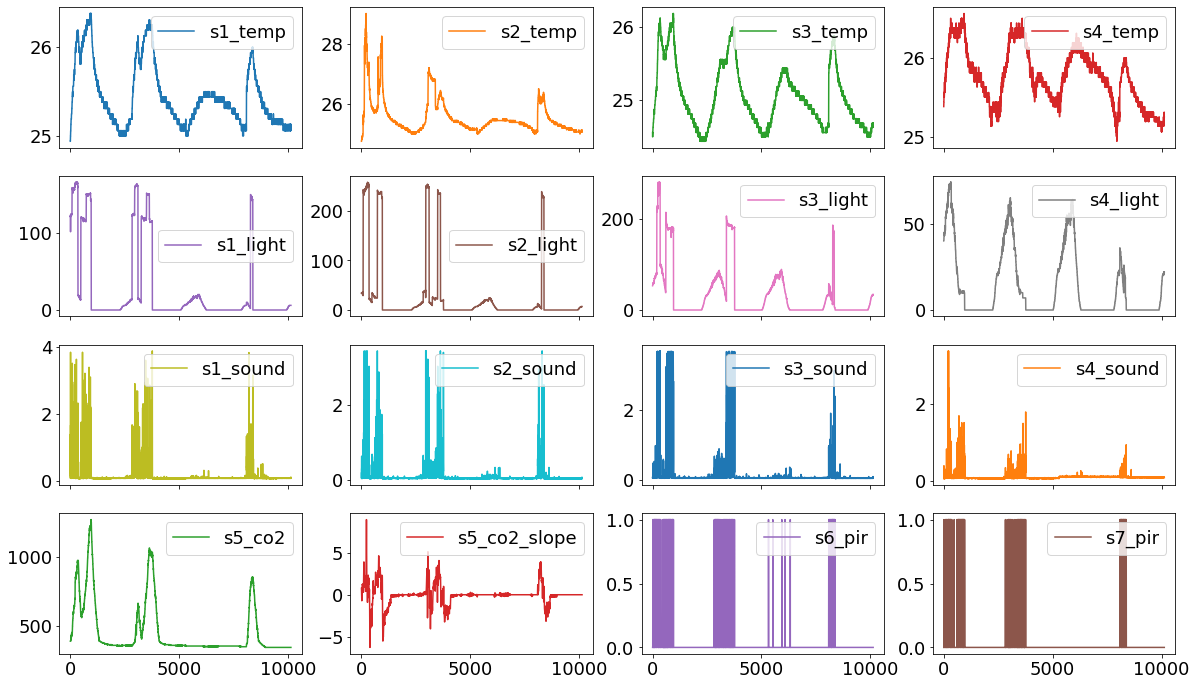

In [10]:
# Per Feature Plot

cols = df[['s1_temp',  's2_temp',      's3_temp',     's4_temp',   's1_light',  's2_light',
           's3_light', 's4_light',     's1_sound',    's2_sound',  's3_sound',  's4_sound',
           's5_co2',   's5_co2_slope', 's6_pir',      's7_pir']]

cols.reset_index(inplace = True)
cols.drop(columns = 'date_time', inplace = True)

plt.figure(figsize= (16,12))
cols.plot(subplots=True, layout=(5,4))

Text(0.5, 0.98, 'Temperature Distribution')

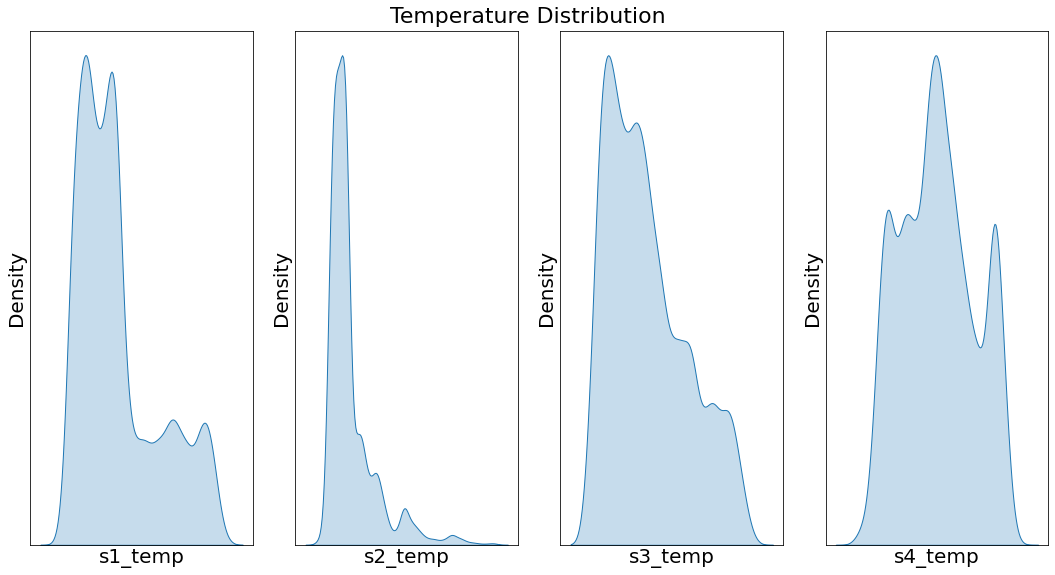

In [11]:
# Distribution of 'temperature' for s1, s2, s3, s4

fig, ax = plt.subplots(1,4, figsize = (15,8))

ax = ax.flatten()

for index, axis in enumerate(ax):
    axis = sns.kdeplot(data = df,
               ax = axis,
               x = f"s{index + 1}_temp",
               fill = True
               )
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlabel(f"s{index + 1}_temp")
fig.tight_layout()
plt.suptitle("Temperature Distribution", va = 'baseline')

Text(0.5, 0.98, 'Light Distribution')

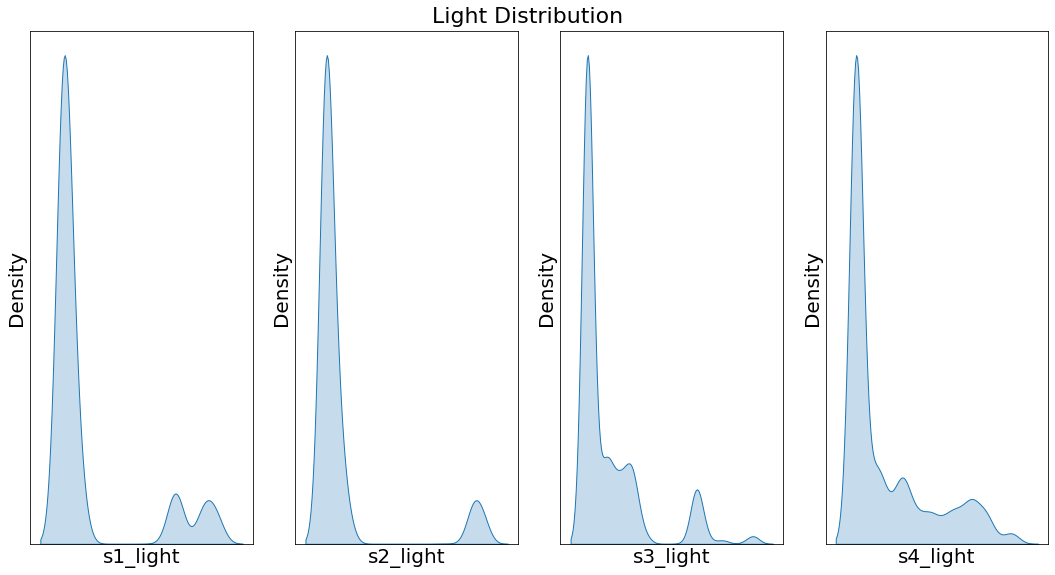

In [12]:
# Distribution of 'light' for s1, s2, s3, s4

fig, ax = plt.subplots(1,4, figsize = (15,8))

ax = ax.flatten()

for index, axis in enumerate(ax):
    axis = sns.kdeplot(data = df,
               ax = axis,
               x = f"s{index + 1}_light",
                   fill = True
               )
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlabel(f"s{index + 1}_light")
fig.tight_layout()
plt.suptitle("Light Distribution", va = 'baseline')

Text(0.5, 0.98, 'Sound Distribution')

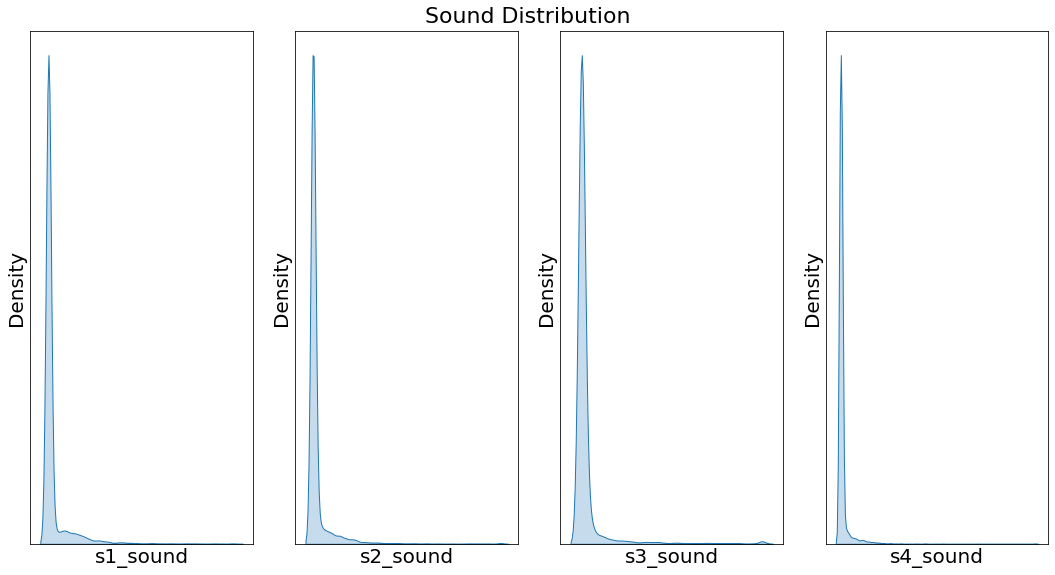

In [13]:
# Distribution of 'sound' for s1, s2, s3, s4

fig, ax = plt.subplots(1,4, figsize = (15,8))

ax = ax.flatten()

for index, axis in enumerate(ax):
    axis = sns.kdeplot(data = df,
               ax = axis,
               x = f"s{index + 1}_sound",
               fill = True
               )
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlabel(f"s{index + 1}_sound")
fig.tight_layout()
plt.suptitle("Sound Distribution", va = 'baseline')

### **Missing values analysis**

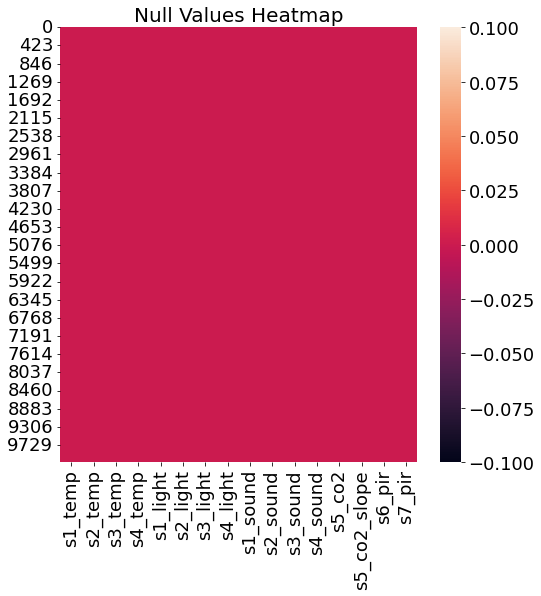

In [14]:
# Null Values heatmap

plt.figure(figsize = (8,8))
plt.title("Null Values Heatmap")
sns.heatmap(cols.isnull())

### **Outlier Analysis**

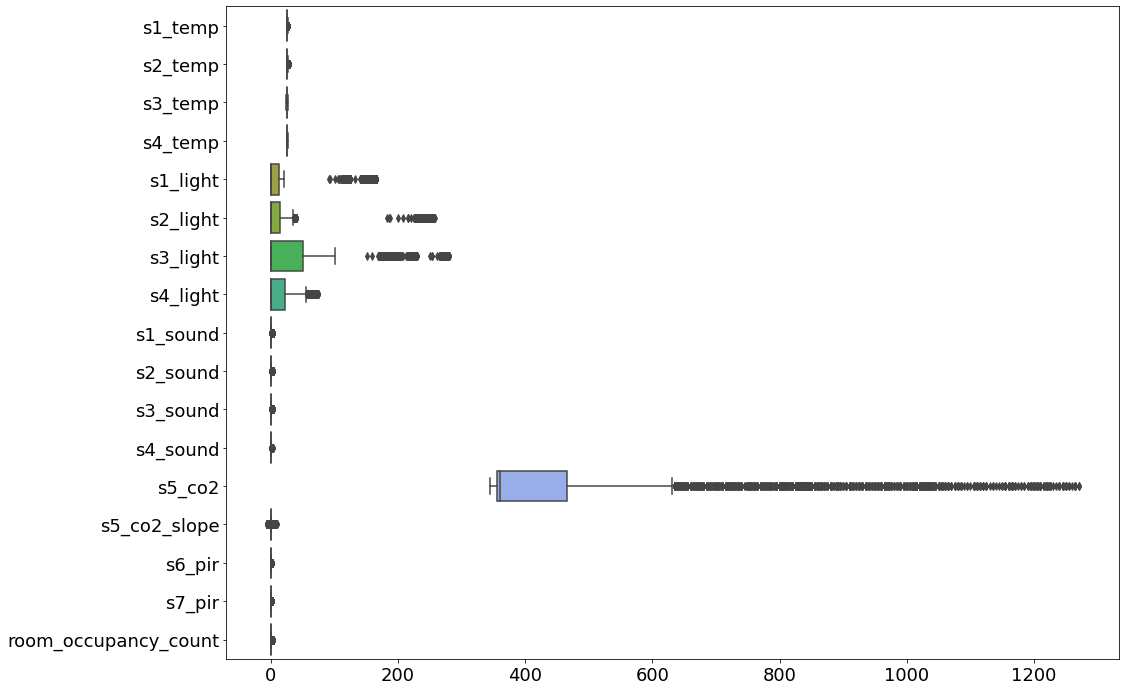

In [15]:
# plot the boxplot to see the outlier of each numerical column

plt.figure(figsize= (16,12))
sns.boxplot(data=df,orient="h")

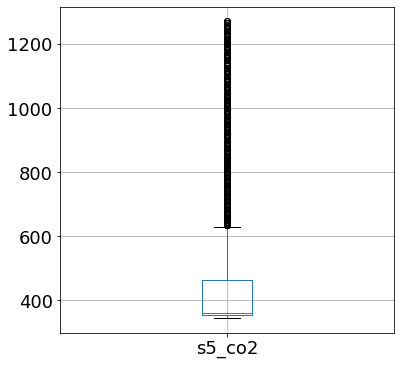

In [16]:
# Boxplot of 's5_co2'

plt.figure(figsize= (6,6))
df.boxplot(column = "s5_co2")

### **Data Imbalance Check**

Text(0.5, 1.0, 'Countplot of the Rooms')

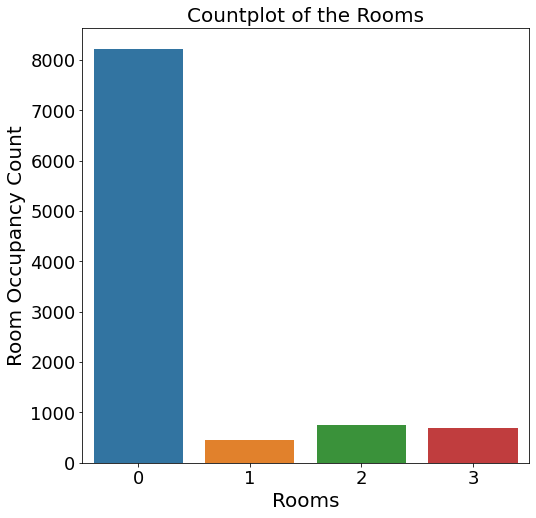

In [17]:
# Checking for data imbalance

plt.figure(figsize = (8,8))
sns.countplot(x = 'room_occupancy_count', data = df)
plt.ylabel('Room Occupancy Count')
plt.xlabel('Rooms')
plt.title('Countplot of the Rooms')

Text(0.5, 1.0, 'Proportion of Room Occupancy')

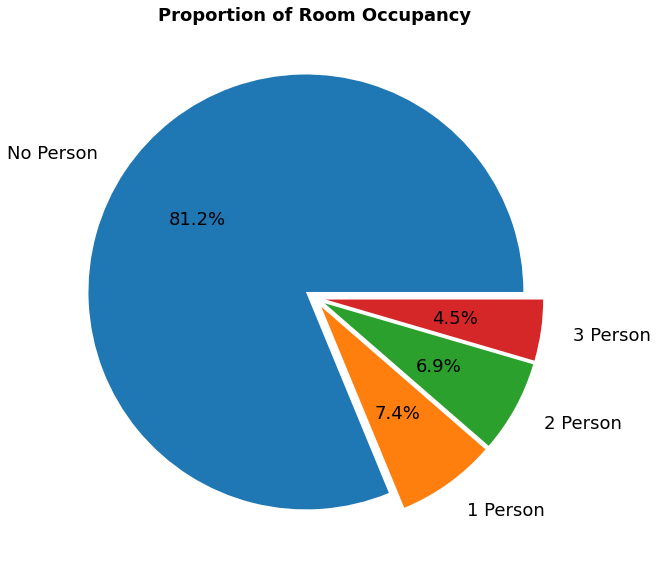

In [18]:
# Pie chart for room occupancy

plt.figure(figsize = (18, 10))
labels = ['No Person', '1 Person', '2 Person', '3 Person']

ax = plt.pie(df['room_occupancy_count'].value_counts(), 
             labeldistance = 1.15, labels = labels, 
             autopct = '%1.1f%%',
             explode = [0.05, 0.05, 0.05, 0.05], 
             textprops = {'fontsize': 18})

plt.title('Proportion of Room Occupancy', 
          fontsize = 18, fontweight = 'bold')

In [19]:
# Check the count of values for target variable

df['room_occupancy_count'].value_counts()

0    8228
2     748
3     694
1     459
Name: room_occupancy_count, dtype: int64

#### **It can be observed that there's a huge imbalance in the dataset, generating synthetic dataset is not an optimal choice here, therefore, undersampling the dataset**

### **Data Undersampling**

In [20]:
# Defining independent and dependent features

X = df.drop('room_occupancy_count', axis = 1)
y = df['room_occupancy_count']

In [21]:
# Undersampling the data

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 0)

X_resampled, y_resampled = rus.fit_resample(X, y)

X_resampled.shape, y_resampled.shape

((1836, 16), (1836,))

Text(0.5, 1.0, 'Countplot of the Rooms')

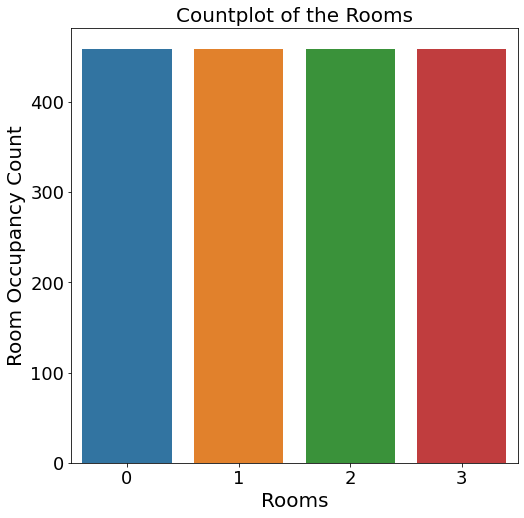

In [22]:
# Data after undersampling

plt.figure(figsize = (8,8))
sns.countplot(y_resampled)
plt.ylabel('Room Occupancy Count')
plt.xlabel('Rooms')
plt.title('Countplot of the Rooms')

In [23]:
# Value Counts after data undersampling

y_resampled.value_counts()

0    459
1    459
2    459
3    459
Name: room_occupancy_count, dtype: int64

### **Bivariate Analysis**

Text(0.5, 1.03, 'Correlations Among Features')

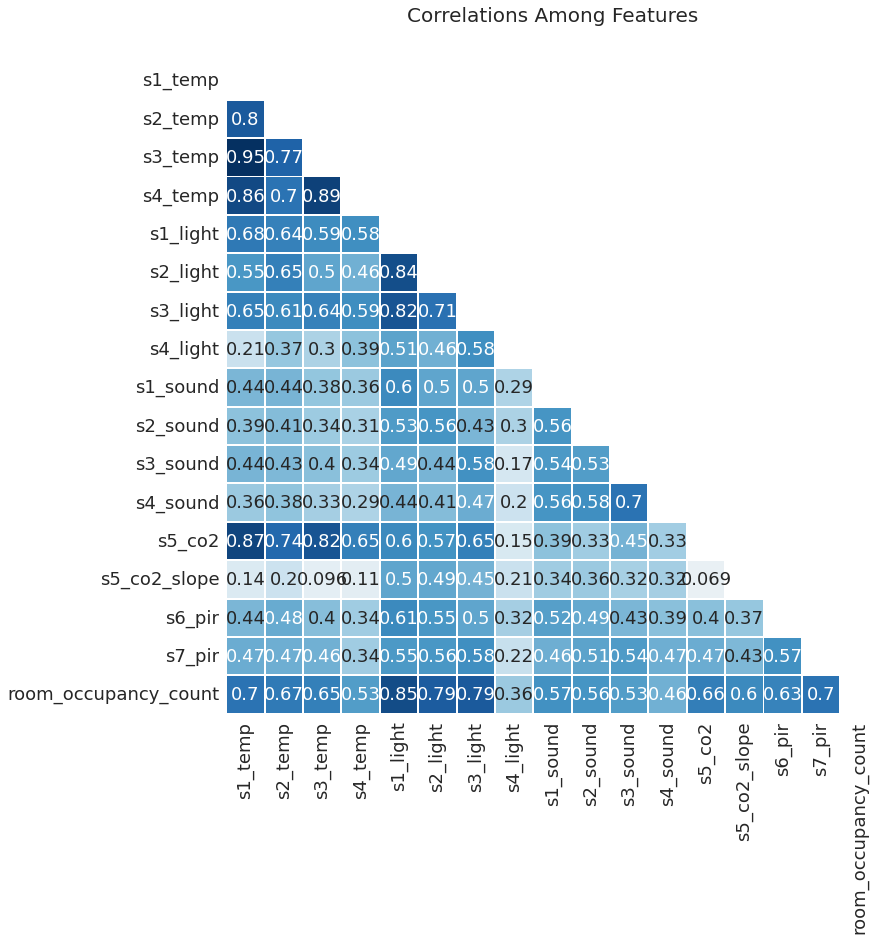

In [24]:
## Correaltion heatmap

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (16,12))
sns.heatmap(df.corr(), annot=True, mask = mask, cbar = False, 
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, linecolor='white', fmt='.2g', center = 0, square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40)

([<matplotlib.axis.XTick at 0x7f552dfd6670>,
 [Text(0, 0, 'No one'),
  Text(0, 0, '1 Person'),
  Text(0, 0, '2 People'),
  Text(0, 0, '3 People')])

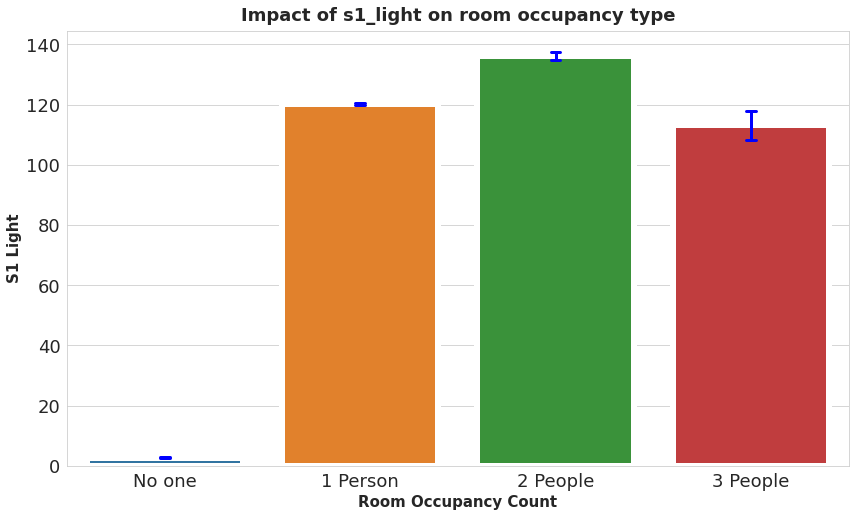

In [25]:
# s1_light room occupancy

plt.subplots(figsize = (14,8))

sns.barplot(x = "room_occupancy_count", y = "s1_light", data = df, linewidth = 6, capsize = .05, errcolor = 'blue', errwidth = 3)
plt.title("Impact of s1_light on room occupancy type", fontsize = 18, fontweight = 'bold', pad = 10)
plt.xlabel("Room Occupancy Count", fontsize = 15, fontweight = 'bold')
plt.ylabel("S1 Light", fontsize = 15, fontweight = 'bold')
names = ['No one', '1 Person', '2 People', '3 People']
val = [0,1,2,3]  
plt.xticks(val, names)

([<matplotlib.axis.XTick at 0x7f552df4e700>,
 [Text(0, 0, 'No one'),
  Text(0, 0, '1 Person'),
  Text(0, 0, '2 People'),
  Text(0, 0, '3 People')])

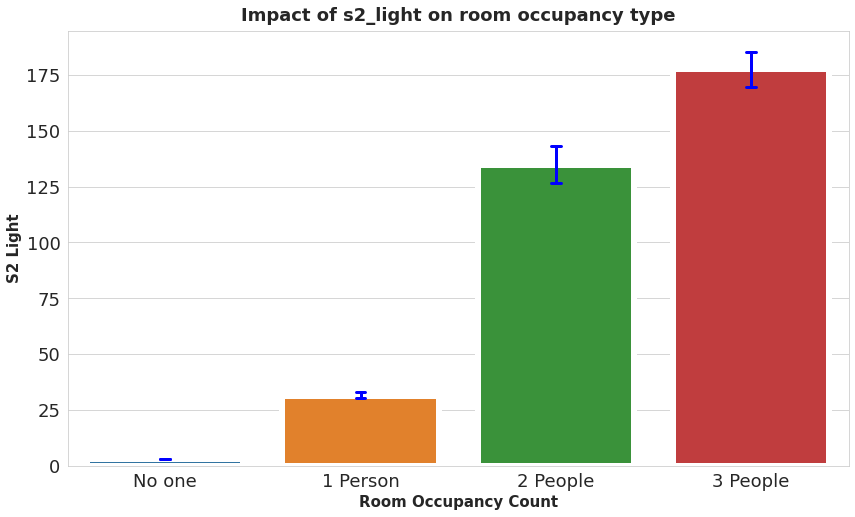

In [26]:
# s2_light room occupancy

plt.subplots(figsize = (14,8))

sns.barplot(x = "room_occupancy_count", y = "s2_light", data = df, linewidth = 6, capsize = .05, errcolor = 'blue', errwidth = 3)
plt.title("Impact of s2_light on room occupancy type", fontsize = 18, fontweight = 'bold', pad = 10)
plt.xlabel("Room Occupancy Count", fontsize = 15, fontweight = 'bold')
plt.ylabel("S2 Light", fontsize = 15, fontweight = 'bold')
names = ['No one', '1 Person', '2 People', '3 People']
val = [0,1,2,3]  
plt.xticks(val, names)

([<matplotlib.axis.XTick at 0x7f552dec6760>,
 [Text(0, 0, 'No one'),
  Text(0, 0, '1 Person'),
  Text(0, 0, '2 People'),
  Text(0, 0, '3 People')])

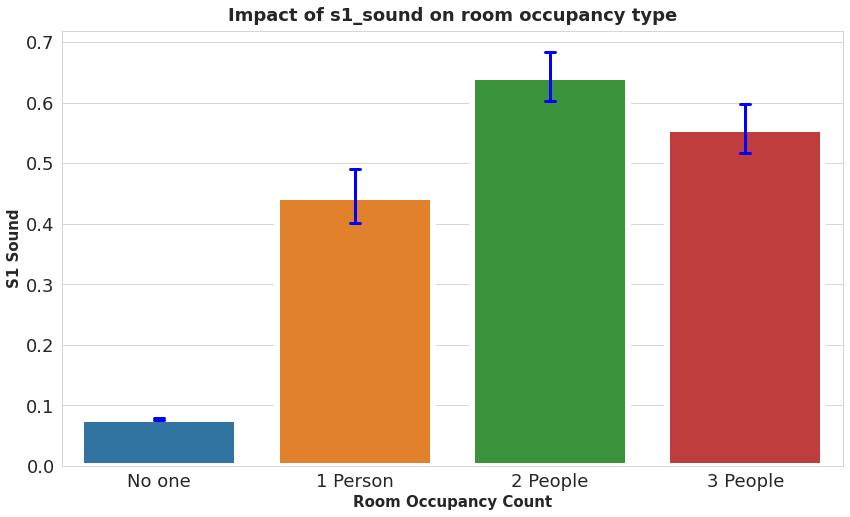

In [27]:
# s1_sound room occupancy

plt.subplots(figsize = (14,8))

sns.barplot(x = "room_occupancy_count", y = "s1_sound", data = df, linewidth = 6, capsize = .05, errcolor = 'blue', errwidth = 3)
plt.title("Impact of s1_sound on room occupancy type", fontsize = 18, fontweight = 'bold', pad = 10)
plt.xlabel("Room Occupancy Count", fontsize = 15, fontweight = 'bold')
plt.ylabel("S1 Sound", fontsize = 15, fontweight = 'bold')
names = ['No one', '1 Person', '2 People', '3 People']
val = [0,1,2,3]  
plt.xticks(val, names)

([<matplotlib.axis.XTick at 0x7f552de39670>,
 [Text(0, 0, 'No one'),
  Text(0, 0, '1 Person'),
  Text(0, 0, '2 People'),
  Text(0, 0, '3 People')])

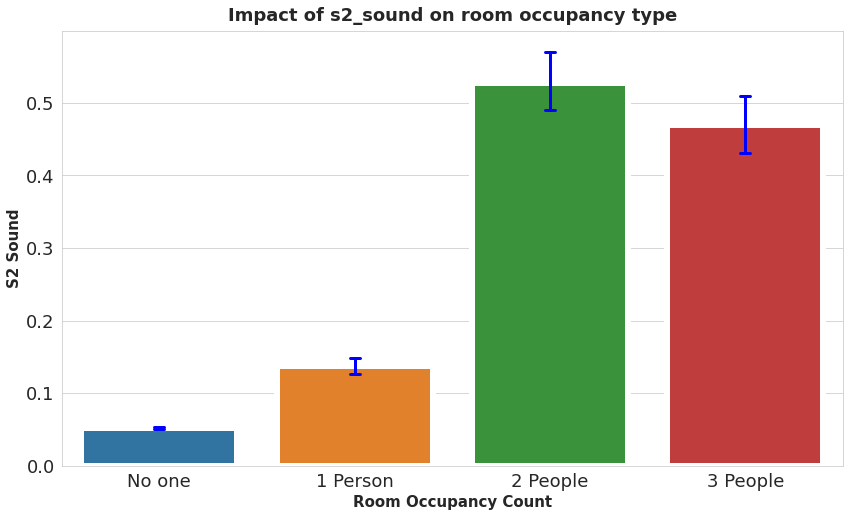

In [28]:
# s2_sound room occupancy

plt.subplots(figsize = (14,8))

sns.barplot(x = "room_occupancy_count", y = "s2_sound", data = df, linewidth = 6, capsize = .05, errcolor = 'blue', errwidth = 3)
plt.title("Impact of s2_sound on room occupancy type", fontsize = 18, fontweight = 'bold', pad = 10)
plt.xlabel("Room Occupancy Count", fontsize = 15, fontweight = 'bold')
plt.ylabel("S2 Sound", fontsize = 15, fontweight = 'bold')
names = ['No one', '1 Person', '2 People', '3 People']
val = [0,1,2,3]  
plt.xticks(val, names)

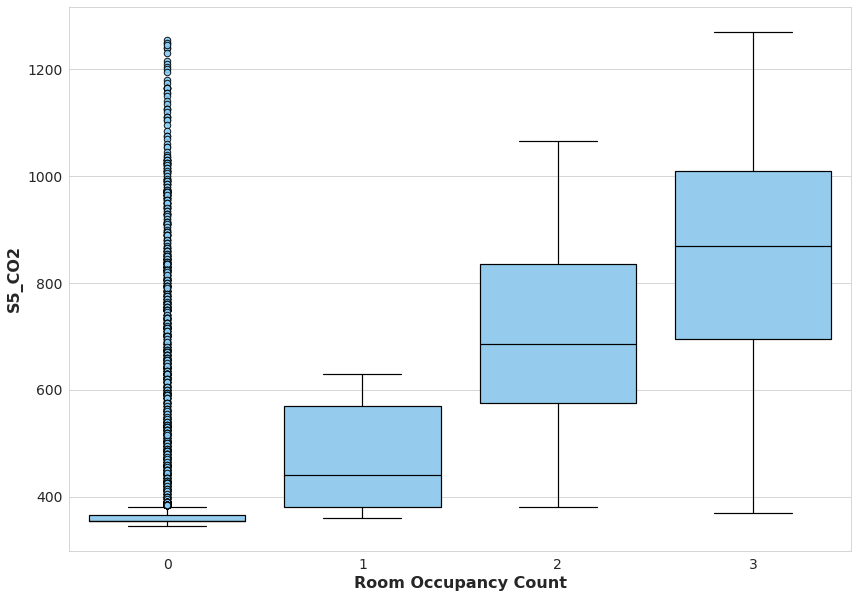

In [29]:
# Rise in CO2 levels with room occupancy

plt.figure(figsize = (14,10))

PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
def plot_box(dataset, x, y, xlabel, ylabel, title, color, order=None):
    ax = sns.boxplot(data = dataset, y = y, x = x, order = order,
                 linewidth = 1.2, color = color, **PROPS,
                 flierprops = dict(marker = 'o', markeredgecolor = 'black', markersize = 6.5, linestyle = 'none', markerfacecolor = color, alpha = 0.9))

    plt.xlabel(xlabel, fontweight = 'bold', fontsize = 16)
    plt.ylabel(ylabel, fontweight = 'bold', fontsize = 16)
    ax.tick_params(labelsize = 14)


plot_box(df, x = "room_occupancy_count", y = "s5_co2", xlabel = 'Room Occupancy Count', ylabel = "S5_CO2", title = "Rise in CO2 levels",
         color = "lightskyblue")

## **Feature Engineering**

### For feature engineering part, since the columns have no null values and the classification problem will mostly deal with tree based algorithmns, therefore, the features are not transformed. For time series classification, addition of time component to the features can help improve model metrics, therefore, a handful of time component features are added to the dataframe like hour of the day, day of the week etc

In [30]:
# Creating features for Time Series Modeling

# New time features
df['date'] = df.index
df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofyear'] = df['date'].dt.dayofyear
df['dayofmonth'] = df['date'].dt.day
df['weekofyear'] = df['date'].dt.weekofyear

## **Feature Selection**

Imported 0.2.03 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.7
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (10129, 26)
#### S

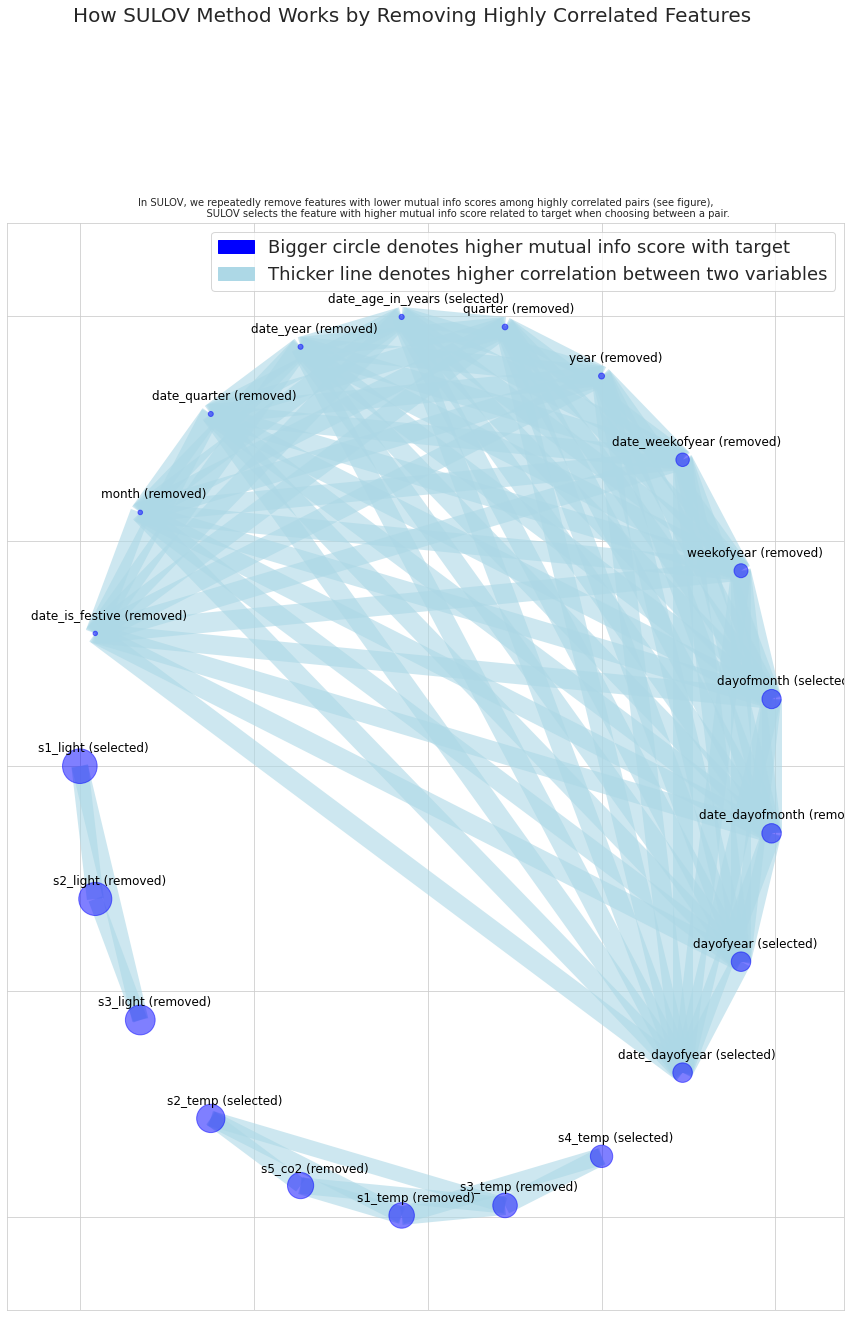

Time taken for SULOV method = 2 seconds
    Adding 6 categorical variables to reduced numeric variables  of 19
Final list of selected 25 vars after SULOV = ['date_hour', 'date_minute', 'dayofweek', 'hour', 's1_sound', 's2_sound', 's3_sound', 's4_light', 's4_sound', 's5_co2_slope', 's6_pir', 's7_pir', 's1_light', 's2_temp', 's4_temp', 'date_dayofyear', 'dayofyear', 'dayofmonth', 'date_age_in_years', 'date_dayofweek', 'date_dayofweek_hour_cross', 'date_month', 'date_month_dayofweek_cross', 'date_month_typeofday_cross', 'date_typeofday']
Converting all features to numeric before sending to XGBoost...
    there were no mixed data types or object columns that errored. Data is all numeric...
Shape of train data after adding missing values flags = (10129, 26)
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#############################################################

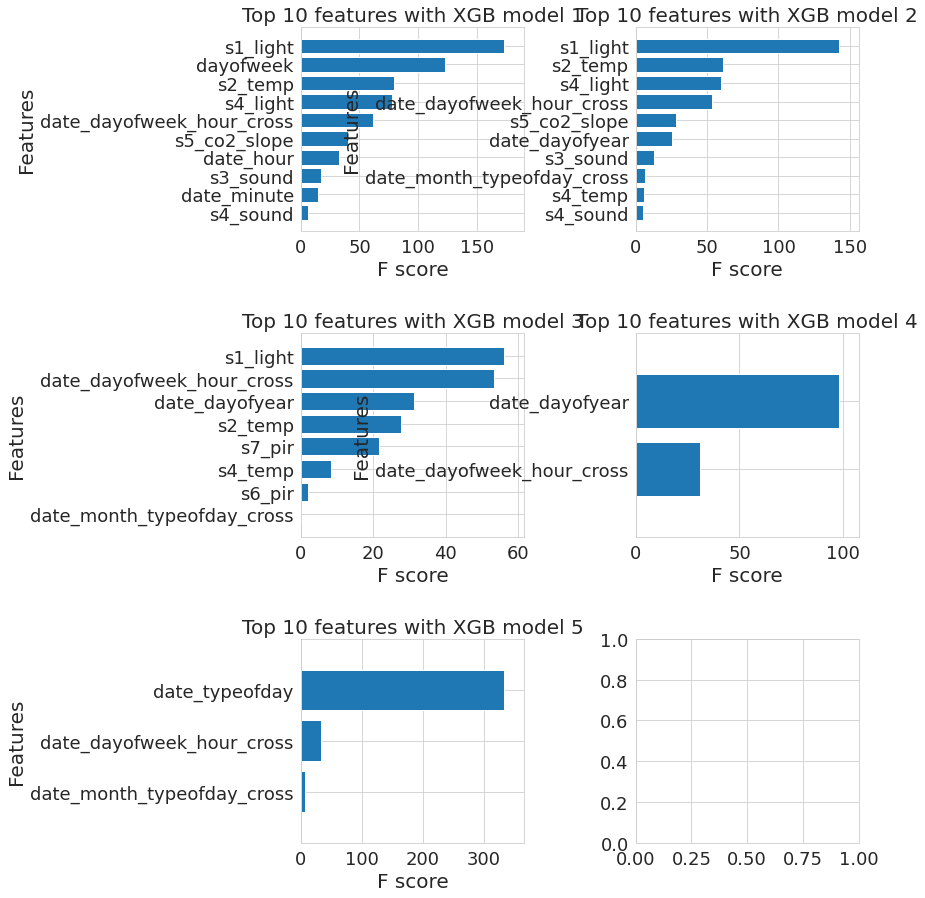

    Completed XGBoost feature selection in 2 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 10 important features:
['s1_light', 'dayofweek', 's2_temp', 's4_light', 'date_dayofweek_hour_cross', 's5_co2_slope', 'date_hour', 's3_sound', 'date_dayofyear', 'date_typeofday']
Total Time taken for featurewiz selection = 8 seconds
Output contains a list of 10 important features and a train dataframe
There are special chars in column names. Please remove them and try again.
There are special chars in column names. Returning with important features and train.


In [31]:
# Feature Selection using Featurewiz

from featurewiz import featurewiz

features = featurewiz(df, target = 'room_occupancy_count', corr_limit = 0.70, verbose = 2)

In [32]:
# Selecting best features

df_selected = X_resampled[['s1_light', 
                           's2_temp', 
                           's4_light',  
                           's5_co2_slope', 
                           's3_sound',
                         ]]

In [33]:
# Preparing Dataset

X = df_selected
y = y_resampled

In [34]:
# Data Preparation

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [35]:
# Intitalize empty DataFrame

table = pd.DataFrame(index = ['Accuracy', 'F1 Score', 'Precision', 'Recall'])

## **Modeling**

### **Model Metrics**

In [36]:
# Metrics

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Print and add model metrics
def model_metrics(model, model_name):
    
    y_pred = model.predict(X_test)

    accuracy   =  accuracy_score(y_test, y_pred)
    f1         =  f1_score(y_test, y_pred, average = 'macro')
    precision  =  precision_score(y_test, y_pred, average = 'macro')
    recall     =  recall_score(y_test, y_pred, average = 'macro')
    clf_report =  classification_report(y_test ,y_pred)

    
    print(f'''
    

          ===========================================================================
          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : {accuracy * 100 :.2f} %

              F1 Score of Model : {f1 :.3f}

              Precsion Score    : {precision :.3f}

              Recall Score      : {recall :.3f} 
              
              
          ===========================================================================
          
          
          
        ''')
    
    
    print(clf_report)
    print('\n \n \n')
    
    # Confusion Matrix

    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.set_theme(style = 'whitegrid', rc = {'figure.figsize' : (16,6)})

    fig, axs = plt.subplots(1,2)
    
    # Number count
    ax1 = sns.heatmap(cf_matrix, annot = True,cmap = 'Reds', ax = axs[0], fmt = "g")
    ax1.set_title('Room Occupancy Prediction Count')
    
    # Percentage
    ax2 = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, fmt = '.2%', cmap = 'Blues', ax = axs[1])
    ax2.set_title('Room Occupancy Prediction in %')
    
    # Storing values in a dataframe
    table[model_name] = [accuracy, f1, precision, recall]
    

### **Decision Tree Model**

In [37]:
# Defining the Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

# Fit on Data
dt.fit(X_train, y_train)

DecisionTreeClassifier()


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 98.55 %

              F1 Score of Model : 0.986

              Precsion Score    : 0.986

              Recall Score      : 0.986 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       133
           1       0.99      0.99      0.99       143
           2       0.97      0.98      0.98       141
           3       0.99      0.99      0.99       134

    accuracy                           0.99       551
   macro avg       0.99      0.99      0.99       551
weighted avg       0.99      0.99      0.99       551


 
 



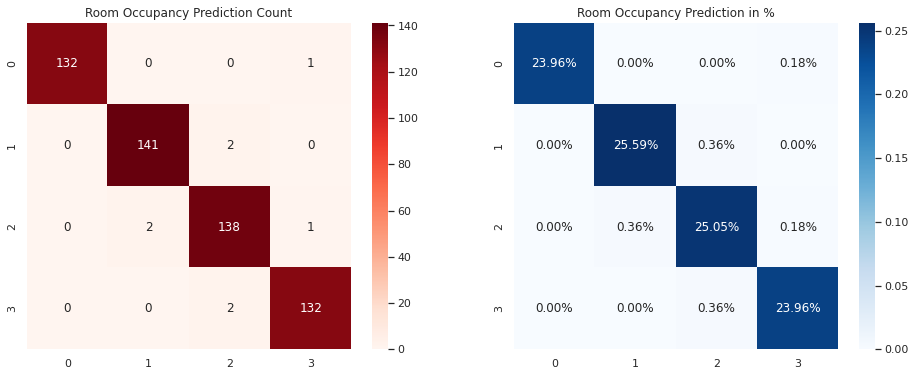

In [38]:
# Check model metrics

model_metrics(dt, 'Decision Tree')

### **Random Forest Model**

In [39]:
# Defining the Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Fit on Data
rf.fit(X_train, y_train)

RandomForestClassifier()


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 98.91 %

              F1 Score of Model : 0.989

              Precsion Score    : 0.989

              Recall Score      : 0.989 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       0.98      0.99      0.98       143
           2       0.99      0.97      0.98       141
           3       0.99      1.00      1.00       134

    accuracy                           0.99       551
   macro avg       0.99      0.99      0.99       551
weighted avg       0.99      0.99      0.99       551


 
 



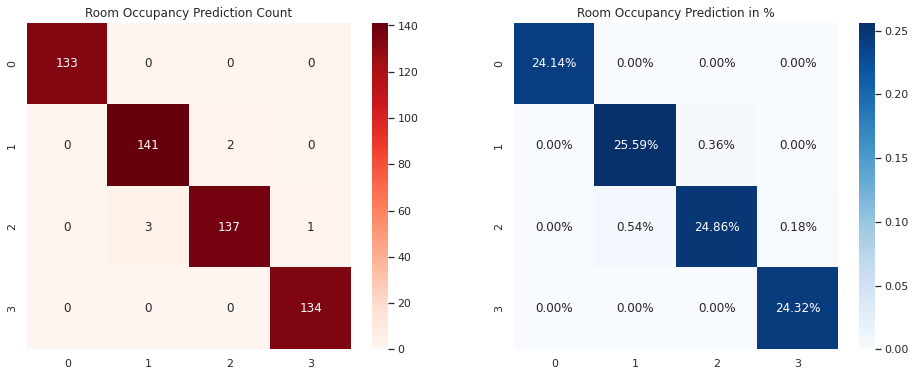

In [40]:
# Check Model Metrics

model_metrics(rf,  'Random Forest')

#### **Hyperparameter Tuning Random Forest Model**

In [41]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [2,4]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [42]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [43]:
# RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [44]:
# Fit on data

rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [45]:
# Find out best params

rf_RandomGrid.best_params_

{'n_estimators': 41,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': True}

In [46]:
# Check Accuracy

print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.974
Test Accuracy - : 0.967


In [47]:
# Model with best parameters

rf_tuned = RandomForestClassifier(n_estimators = 80,
                                  min_samples_split = 2,
                                  min_samples_leaf = 1,
                                  max_features = 'sqrt',
                                  max_depth = 4,
                                  bootstrap = True)

# Fit on Data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=80)


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 96.73 %

              F1 Score of Model : 0.968

              Precsion Score    : 0.968

              Recall Score      : 0.968 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       133
           1       0.95      0.99      0.97       143
           2       0.96      0.92      0.94       141
           3       0.97      0.97      0.97       134

    accuracy                           0.97       551
   macro avg       0.97      0.97      0.97       551
weighted avg       0.97      0.97      0.97       551


 
 



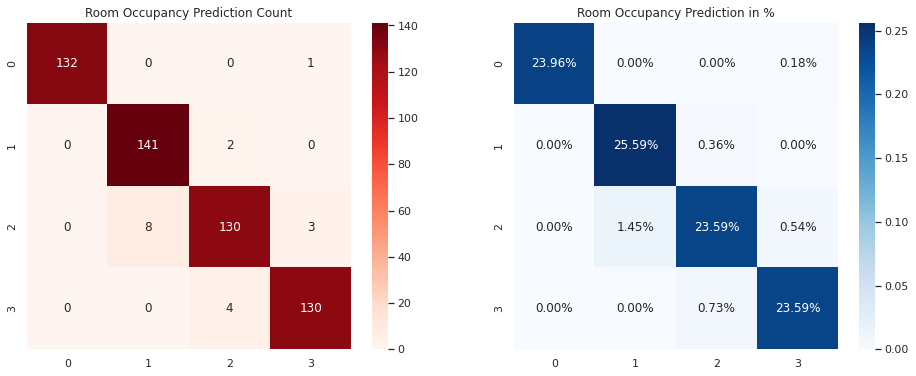

In [48]:
# Check Metrics of tuned model

model_metrics(rf_tuned, 'Tuned RandomForest')

In [49]:
table.T

,Accuracy,F1 Score,Precision,Recall
Decision Tree,0.985481,0.985645,0.985730,0.985573
Random Forest,0.989111,0.989358,0.989343,0.989411
Tuned RandomForest,0.967332,0.967689,0.968085,0.967658


#### **The results show that the default hyperparameters give better accuracy than the tuned ones**

### **Bagging Classifier**

In [50]:
# Defining the Bagging Classifier Model

from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()

# Fit on data
bc.fit(X_train, y_train)

BaggingClassifier()


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 97.64 %

              F1 Score of Model : 0.976

              Precsion Score    : 0.977

              Recall Score      : 0.976 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       133
           1       0.99      0.98      0.98       143
           2       0.96      0.97      0.97       141
           3       0.96      0.99      0.97       134

    accuracy                           0.98       551
   macro avg       0.98      0.98      0.98       551
weighted avg       0.98      0.98      0.98       551


 
 



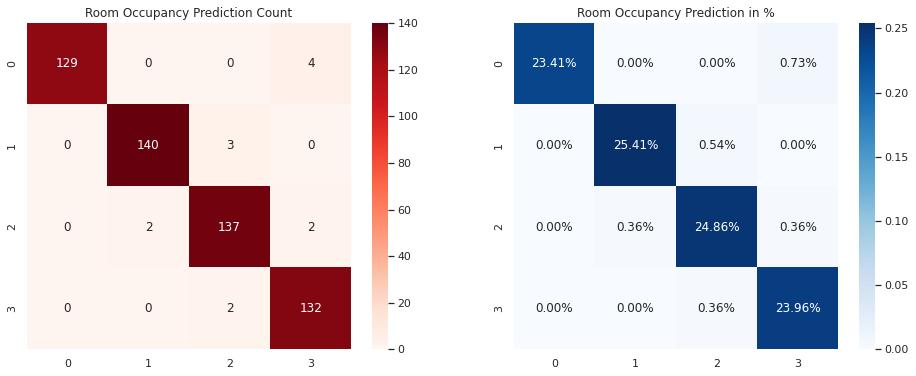

In [51]:
# Check model metrics

model_metrics(bc, 'Bagging Classifier')

### **SVM Model**

In [52]:
# Defining the SVM Model

from sklearn.svm import LinearSVC

svm = LinearSVC()

# Fit on data
svm.fit(X_train, y_train)

LinearSVC()


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 55.35 %

              F1 Score of Model : 0.482

              Precsion Score    : 0.558

              Recall Score      : 0.558 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       133
           1       0.00      0.00      0.00       143
           2       0.37      0.99      0.54       141
           3       0.88      0.27      0.41       134

    accuracy                           0.55       551
   macro avg       0.56      0.56      0.48       551
weighted avg       0.55      0.55      0.47       551


 
 



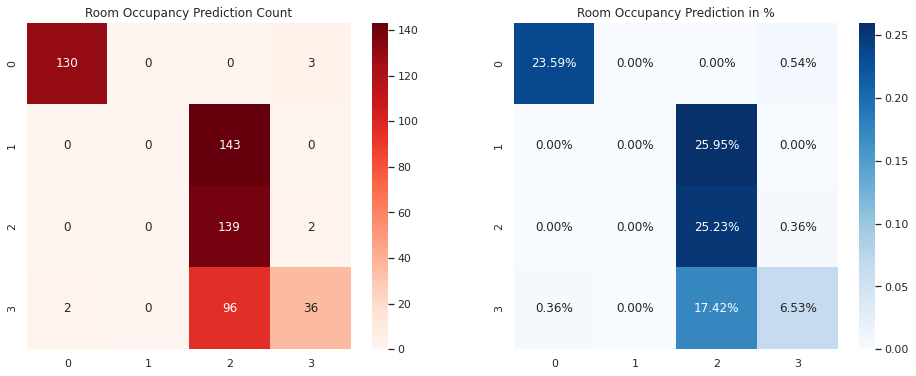

In [53]:
# Check model metrics

model_metrics(svm, 'SVC')

### **KNeighbors Classifier**

In [54]:
# Defining the KNN Model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 15)

# Fit on data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 94.74 %

              F1 Score of Model : 0.948

              Precsion Score    : 0.949

              Recall Score      : 0.948 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       133
           1       0.91      0.97      0.94       143
           2       0.94      0.89      0.91       141
           3       0.95      0.98      0.96       134

    accuracy                           0.95       551
   macro avg       0.95      0.95      0.95       551
weighted avg       0.95      0.95      0.95       551


 
 



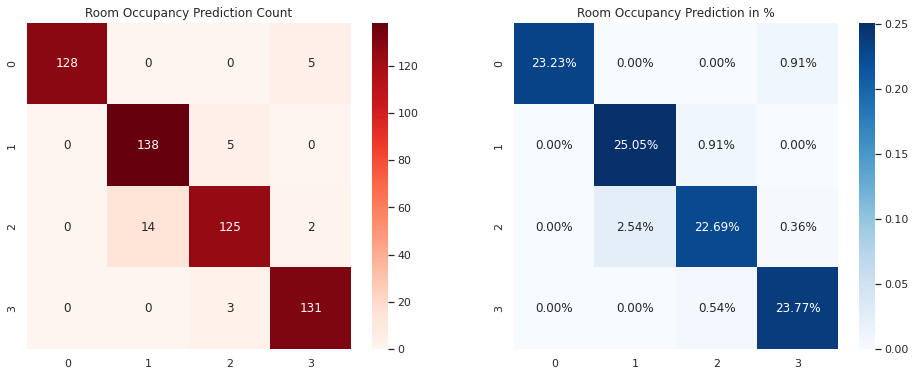

In [55]:
# Check model metrics

model_metrics(knn, 'KNN')

#### **Hyperparameter Tuning KNeighbors Classifier**

In [56]:
# Parameters 

grid_params = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [57]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [58]:
# Fit model on data
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [59]:
# Get best parameters
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [60]:
# Tuned KNN Model

tuned_knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance', algorithm = 'brute',metric = 'manhattan')

# Fit on data
tuned_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', weights='distance')


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 98.37 %

              F1 Score of Model : 0.984

              Precsion Score    : 0.984

              Recall Score      : 0.984 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       133
           1       0.99      0.99      0.99       143
           2       0.98      0.98      0.98       141
           3       0.96      0.99      0.98       134

    accuracy                           0.98       551
   macro avg       0.98      0.98      0.98       551
weighted avg       0.98      0.98      0.98       551


 
 



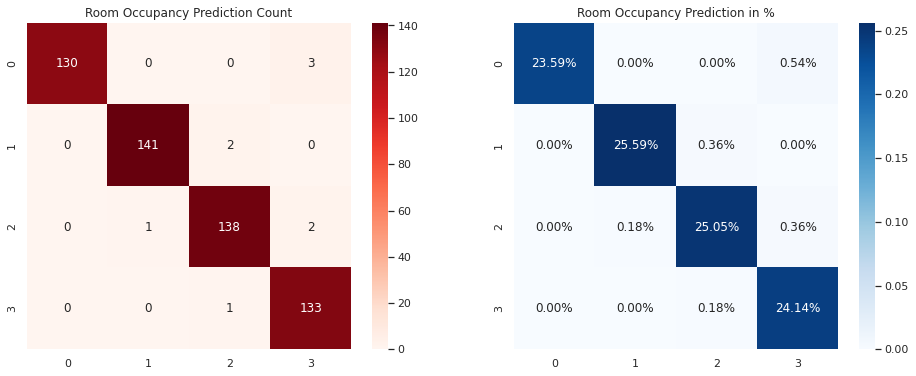

In [63]:
# Model Metrics on tuned data

model_metrics(tuned_knn, 'Tuned KNeighbors Classifier')

### **Naive Bayes Model**

In [64]:
# Defining the Naive Bayes Model

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# Fit on data
gnb.fit(X_train, y_train)

GaussianNB()


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 78.22 %

              F1 Score of Model : 0.772

              Precsion Score    : 0.806

              Recall Score      : 0.780 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       133
           1       0.82      0.94      0.88       143
           2       0.59      0.74      0.66       141
           3       0.88      0.45      0.59       134

    accuracy                           0.78       551
   macro avg       0.81      0.78      0.77       551
weighted avg       0.80      0.78      0.77       551


 
 



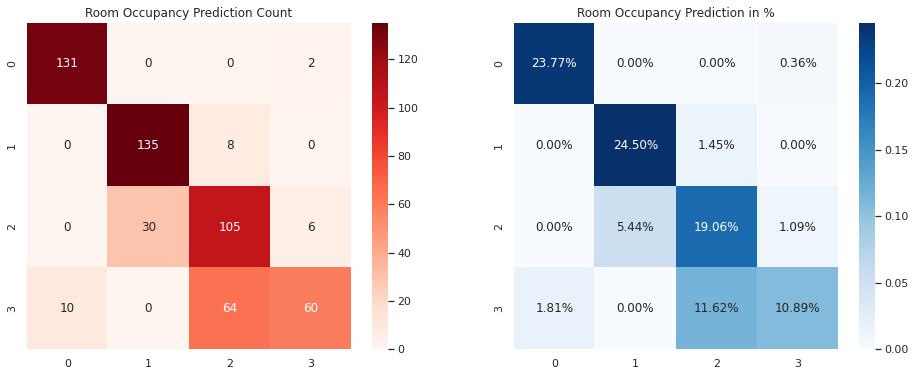

In [65]:
# Check model metrics

model_metrics(gnb, 'Naive Bayes')

### **Logistic Regression**

In [66]:
# Defining the Logostic Regression Model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear', random_state = 0)

# Fit on data
lr.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 70.24 %

              F1 Score of Model : 0.693

              Precsion Score    : 0.692

              Recall Score      : 0.705 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       133
           1       0.71      0.85      0.78       143
           2       0.54      0.37      0.44       141
           3       0.55      0.60      0.57       134

    accuracy                           0.70       551
   macro avg       0.69      0.70      0.69       551
weighted avg       0.69      0.70      0.69       551


 
 



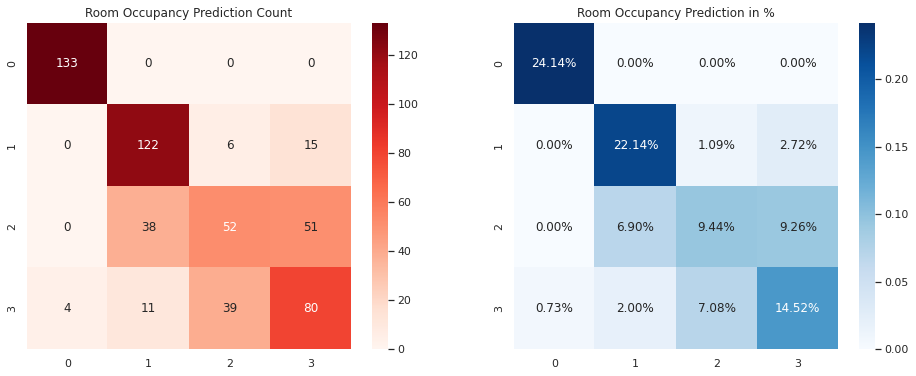

In [67]:
# Check model metrics

model_metrics(lr, 'Logistic Regression')

### **ExtraTrees Classifier**

In [68]:
# Defining the ExtraTrees Classifier Model

from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier()

# Fir on data
et.fit(X_train, y_train)

ExtraTreesClassifier()


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 99.09 %

              F1 Score of Model : 0.991

              Precsion Score    : 0.991

              Recall Score      : 0.991 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       0.99      0.99      0.99       143
           2       0.98      0.99      0.98       141
           3       0.99      0.99      0.99       134

    accuracy                           0.99       551
   macro avg       0.99      0.99      0.99       551
weighted avg       0.99      0.99      0.99       551


 
 



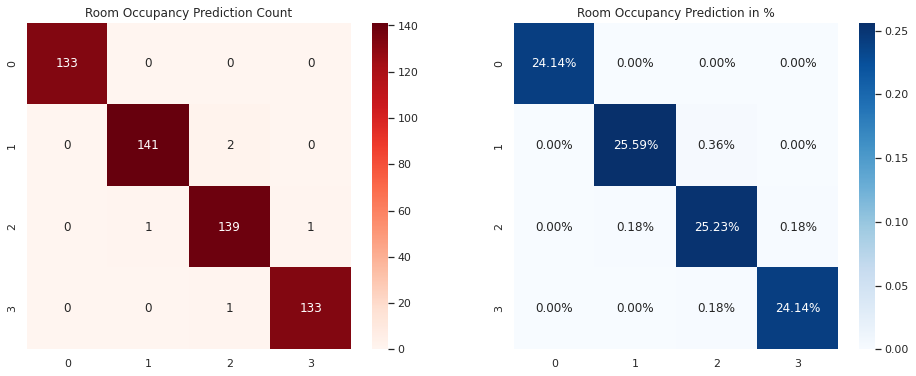

In [69]:
# Check model metrics

model_metrics(et, 'ExtraTrees Classifier')

### **LightGBM Model**

In [70]:
# Defining LightGBM Model

import lightgbm as lgb

model_lgb = lgb.LGBMClassifier(learning_rate = 0.09, max_depth = -5, random_state = 42)

# Fit model on data
model_lgb.fit(X_train, y_train,
          eval_set = [(X_test, y_test), (X_train, y_train)],
          verbose = 2,
          eval_metric = 'logloss')

[2]	training's multi_logloss: 0.9838	valid_0's multi_logloss: 1.00166
[4]	training's multi_logloss: 0.733761	valid_0's multi_logloss: 0.758785
[6]	training's multi_logloss: 0.558324	valid_0's multi_logloss: 0.587017
[8]	training's multi_logloss: 0.431669	valid_0's multi_logloss: 0.460265
[10]	training's multi_logloss: 0.337939	valid_0's multi_logloss: 0.366252
[12]	training's multi_logloss: 0.267582	valid_0's multi_logloss: 0.29562
[14]	training's multi_logloss: 0.214658	valid_0's multi_logloss: 0.242978
[16]	training's multi_logloss: 0.171742	valid_0's multi_logloss: 0.200122
[18]	training's multi_logloss: 0.139708	valid_0's multi_logloss: 0.168929
[20]	training's multi_logloss: 0.113133	valid_0's multi_logloss: 0.144291
[22]	training's multi_logloss: 0.0917724	valid_0's multi_logloss: 0.125166
[24]	training's multi_logloss: 0.0745502	valid_0's multi_logloss: 0.10959
[26]	training's multi_logloss: 0.0606372	valid_0's multi_logloss: 0.09808
[28]	training's multi_logloss: 0.0495277	vali

LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 98.37 %

              F1 Score of Model : 0.984

              Precsion Score    : 0.984

              Recall Score      : 0.984 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       0.97      0.99      0.98       143
           2       0.97      0.96      0.97       141
           3       0.99      0.99      0.99       134

    accuracy                           0.98       551
   macro avg       0.98      0.98      0.98       551
weighted avg       0.98      0.98      0.98       551


 
 



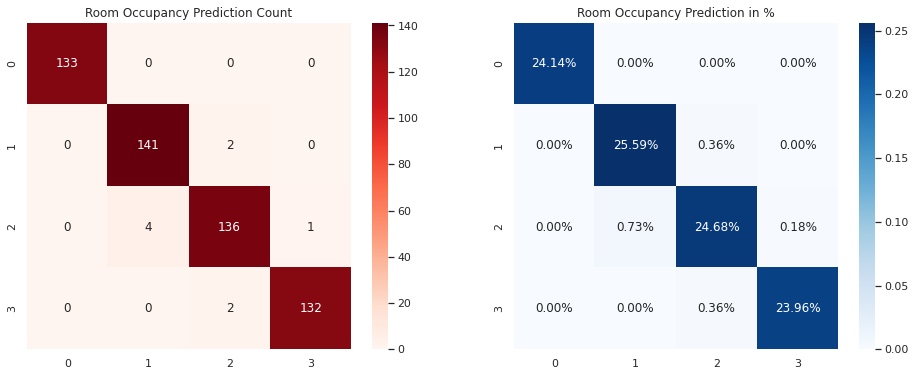

In [71]:
# Check model metrics

model_metrics(model_lgb, 'LightGBM')

### **Catboost Classifier**

In [72]:
# Defining the Catboost Model

import catboost as cb

model_cb = cb.CatBoostClassifier()

# Fit on Data
model_cb.fit(X_train, y_train, verbose = False)


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 98.55 %

              F1 Score of Model : 0.986

              Precsion Score    : 0.986

              Recall Score      : 0.986 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       133
           1       0.99      0.99      0.99       143
           2       0.97      0.98      0.98       141
           3       0.99      0.99      0.99       134

    accuracy                           0.99       551
   macro avg       0.99      0.99      0.99       551
weighted avg       0.99      0.99      0.99       551


 
 



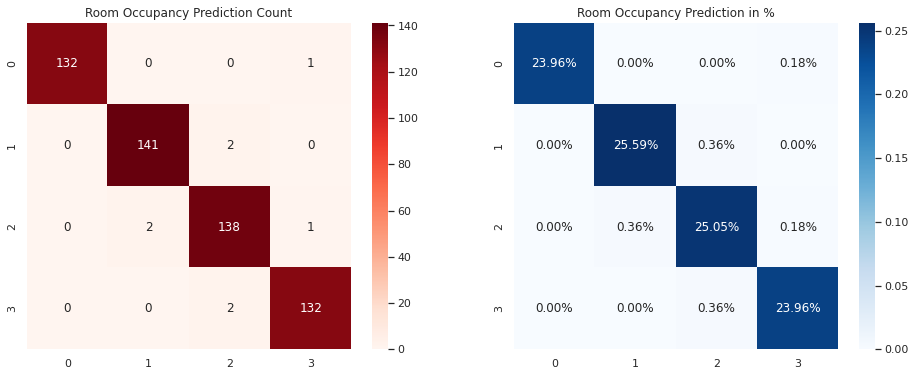

In [73]:
# Check model metrics

model_metrics(model_cb, 'CatBoost')

### **Gradient Boosting Classifier**

In [74]:
# Gradient Boosting Model

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

# Fit on Data
gbc.fit(X_train, y_train)

GradientBoostingClassifier()


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 98.19 %

              F1 Score of Model : 0.982

              Precsion Score    : 0.982

              Recall Score      : 0.982 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       133
           1       0.98      0.99      0.98       143
           2       0.97      0.96      0.97       141
           3       0.98      0.99      0.98       134

    accuracy                           0.98       551
   macro avg       0.98      0.98      0.98       551
weighted avg       0.98      0.98      0.98       551


 
 



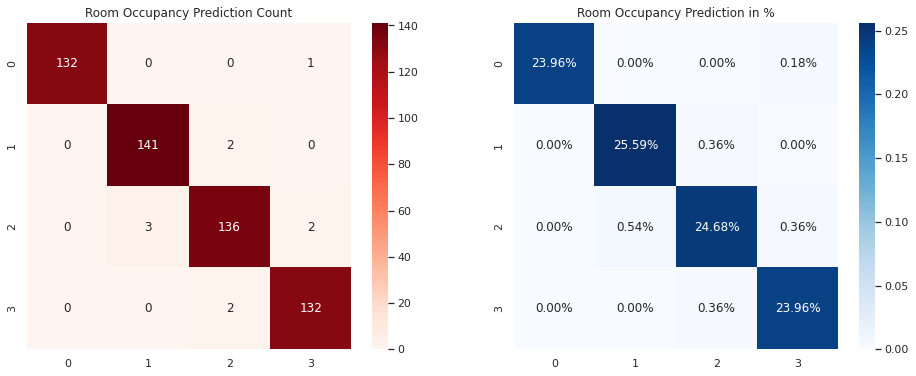

In [75]:
# Model Metrics

model_metrics(gbc, 'Gradient Boosting')

### **AdaBoost Classifier**

In [76]:
# AdaBoost Model

from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
adaboost = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

# Fit model on data
adaboost.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 74.77 %

              F1 Score of Model : 0.749

              Precsion Score    : 0.758

              Recall Score      : 0.747 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       133
           1       0.95      0.90      0.92       143
           2       0.51      0.65      0.57       141
           3       0.57      0.46      0.51       134

    accuracy                           0.75       551
   macro avg       0.76      0.75      0.75       551
weighted avg       0.76      0.75      0.75       551


 
 



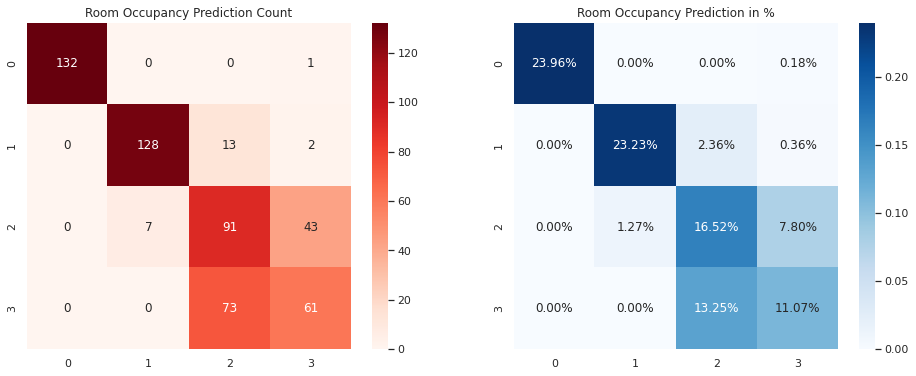

In [77]:
# Model Metrics

model_metrics(adaboost, 'AdaBoost')

### **XGBoost Classifier**

In [78]:
# XGBoost Model

import xgboost as xgb
from xgboost import XGBClassifier

model_xgb = XGBClassifier()

# Fit on Data
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [79]:
# Model Metrics

y_pred_xgb = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)


    

          ==================  E V A L U A T I O N   M E T R I C S  ==================
          
          
              Accuracy of Model : 98.37 %

              F1 Score of Model : 0.984

              Precsion Score    : 0.984

              Recall Score      : 0.984 
              
              
          
          
          
        
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       0.97      0.99      0.98       143
           2       0.97      0.96      0.97       141
           3       0.99      0.99      0.99       134

    accuracy                           0.98       551
   macro avg       0.98      0.98      0.98       551
weighted avg       0.98      0.98      0.98       551


 
 



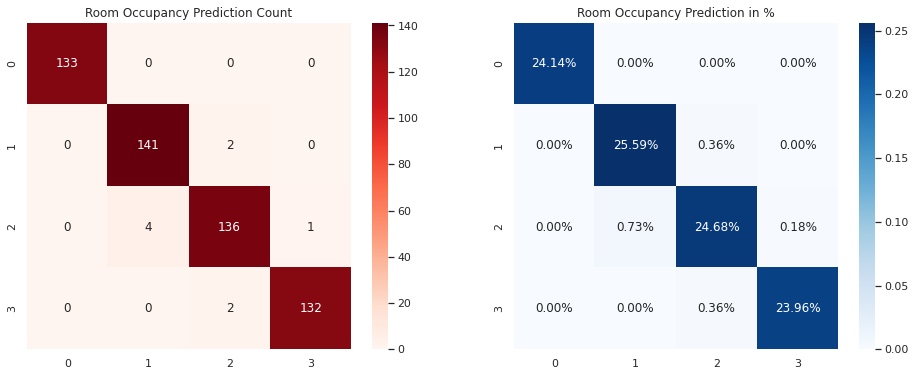

In [80]:
model_metrics(model_xgb, 'XGBoost')

### **Neural Networks**

#### **Since Neural Networks get affected less by imbalanced data and they work well with large data and might perform bad with small data, therefore, using the original data for Neural Network methods than using a sampled data of 1836 rows**

In [81]:
# Defining X and y for Neural Networks

X = df[[
        's1_light', 
        's2_temp', 
        's4_light',  
        's5_co2_slope', 
        's3_sound',
      ]]

y = df['room_occupancy_count']

In [82]:
# Data Preparation

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Divide the data into train set, validation set, and test set
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size = 0.1)
X_train_nn, X_valid_nn, y_train_nn, y_valid_nn = train_test_split(X_train_nn, y_train_nn, test_size = .1)

# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_nn)
X_valid_scaled = scaler.transform(X_valid_nn)
X_test_scaled = scaler.transform(X_test_nn)

# Change the labels dataset to one_hot
y_train_nn, y_valid_nn, y_test_nn = to_categorical(y_train_nn), to_categorical(y_valid_nn), to_categorical(y_test_nn)

# Check the shape of the data
print(X_train_scaled.shape, X_valid_scaled.shape, X_test_scaled.shape)

(8204, 5) (912, 5) (1013, 5)


In [83]:
# Halving the learning rate when val_loss stop reduce during training

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor  = 'val_loss',
                                                               patience = 3,
                                                               verbose  = 0,
                                                               factor   = 0.5,
                                                               min_lr   = 0.00001)


In [84]:
# Neural Network Model

model_class = tf.keras.Sequential([
                                    tf.keras.layers.Dense(128, activation = 'relu', input_shape = [5]),
                                    tf.keras.layers.Dense(128, activation = 'relu'),
                                    tf.keras.layers.Dense(4,   activation = 'softmax')
                                  ])

In [85]:
model_class.compile(loss      = 'categorical_crossentropy',
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics   = ['accuracy'])

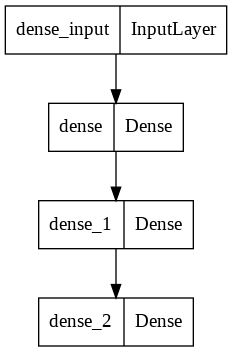

In [86]:
from keras.utils.vis_utils import plot_model

plot_model(model_class)

In [87]:
# Model Summary

model_class.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                                 
Total params: 17,796
Trainable params: 17,796
Non-trainable params: 0
_________________________________________________________________


In [88]:
history_nn = model_class.fit(X_train_scaled, y_train_nn,
                             epochs = 25,
                             batch_size = 32,
                             validation_data = (X_valid_scaled, y_valid_nn),
                             callbacks = [learning_rate_reduction],
                             verbose = 1)

Epoch 1/25
257/257 [==============================] - 2s 4ms/step - loss: 0.3841 - accuracy: 0.8798 - val_loss: 0.1955 - val_accuracy: 0.9057 - lr: 0.0010
Epoch 2/25
257/257 [==============================] - 1s 4ms/step - loss: 0.1708 - accuracy: 0.9211 - val_loss: 0.1403 - val_accuracy: 0.9397 - lr: 0.0010
Epoch 3/25
257/257 [==============================] - 2s 7ms/step - loss: 0.1264 - accuracy: 0.9504 - val_loss: 0.1109 - val_accuracy: 0.9507 - lr: 0.0010
Epoch 4/25
257/257 [==============================] - 1s 5ms/step - loss: 0.1007 - accuracy: 0.9654 - val_loss: 0.0877 - val_accuracy: 0.9748 - lr: 0.0010
Epoch 5/25
257/257 [==============================] - 1s 3ms/step - loss: 0.0784 - accuracy: 0.9750 - val_loss: 0.0708 - val_accuracy: 0.9748 - lr: 0.0010
Epoch 6/25
257/257 [==============================] - 1s 3ms/step - loss: 0.0642 - accuracy: 0.9781 - val_loss: 0.0611 - val_accuracy: 0.9814 - lr: 0.0010
Epoch 7/25
257/257 [==============================] - 1s 3ms/step - lo

In [89]:
# Model Metrics

def process_data(data):
    return np.array(tf.argmax(data, axis = 1), dtype = 'float32')

y_pred_nn = process_data(model_class.predict(X_test_scaled))

print(classification_report(tf.argmax(y_test_nn, axis = 1), y_pred_nn))

accuracy_nn = accuracy_score(process_data(y_test_nn), y_pred_nn)
f1_nn = f1_score(process_data(y_test_nn), y_pred_nn, average = 'macro')
precision_nn = precision_score(process_data(y_test_nn), y_pred_nn, average = 'macro')
recall_nn = recall_score(process_data(y_test_nn), y_pred_nn, average = 'macro')


table['ANN'] = [accuracy_nn, f1_nn, precision_nn, recall_nn]

32/32 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       818
           1       0.96      1.00      0.98        50
           2       1.00      0.96      0.98        68
           3       0.97      1.00      0.99        77

    accuracy                           1.00      1013
   macro avg       0.98      0.99      0.99      1013
weighted avg       1.00      1.00      1.00      1013



#### **Convergence Graphs**

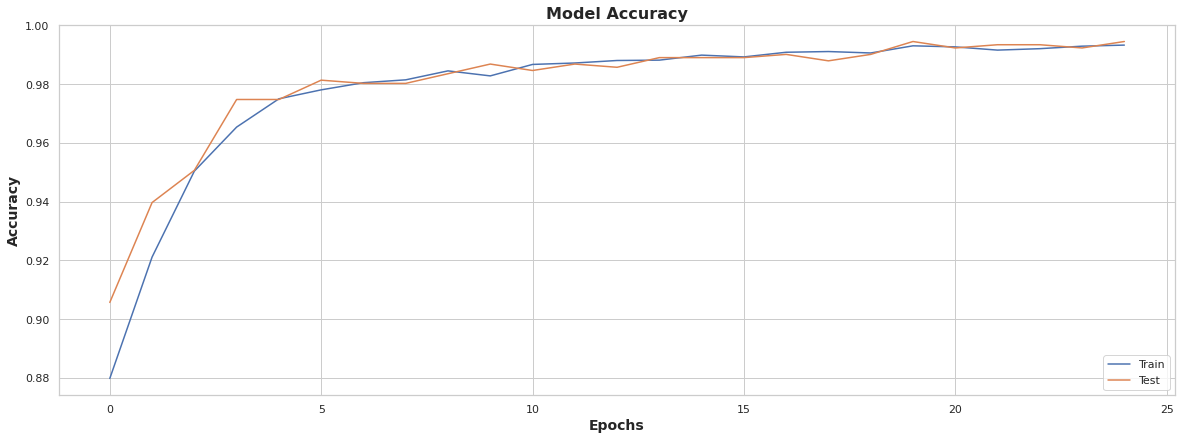

In [90]:
# Plot model accuracy

plt.figure(figsize = (20,15))
plt.subplot(2,1,1)
plt.plot(history_nn.history['accuracy'])
plt.plot(history_nn.history['val_accuracy'])
plt.title('Model Accuracy', fontweight = 'bold', fontsize = 16)
plt.ylabel('Accuracy', fontweight = 'bold', fontsize = 14)
plt.xlabel('Epochs', fontweight = 'bold', fontsize = 14)
plt.legend(['Train', 'Test'], loc = 'lower right')

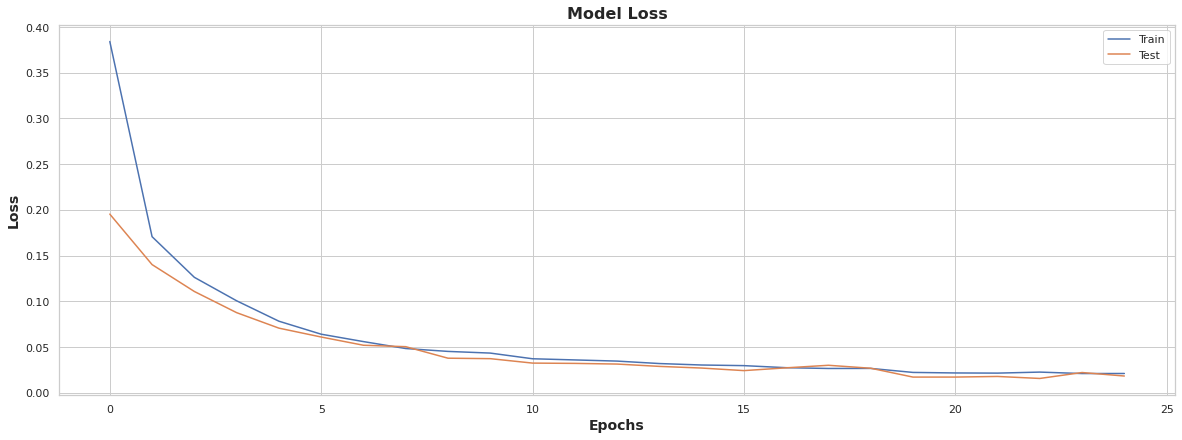

In [91]:
# Plot model loss

plt.figure(figsize = (20,15))
plt.subplot(2,1,1)
plt.plot(history_nn.history['loss'])
plt.plot(history_nn.history['val_loss'])
plt.title('Model Loss', fontweight = 'bold', fontsize = 16)
plt.ylabel('Loss', fontweight = 'bold', fontsize = 14)
plt.xlabel('Epochs', fontweight = 'bold', fontsize = 14)
plt.legend(['Train', 'Test'], loc = 'Upper right')

### **LSTM Model**

In [92]:
# Preparing Data for LSTM Model

from keras.utils import to_categorical

def generate_data(X, y, sequence_length = 10, step = 1):
    
    X_local = []
    y_local = []
    
    for start in range(0, len(data) - sequence_length, step):
        end = start + sequence_length
        X_local.append(X[start:end])
        y_local.append(y[end-1])
    
    return np.array(X_local), np.array(y_local)


# Independent and target feature
X_lstm, y_lstm = generate_data(X.values, y)

In [93]:
# Checking shape 

X_lstm.shape, y_lstm.shape

((10119, 10, 5), (10119,))

In [94]:
# LSTM Model

from keras.layers import LSTM, Dropout, Dense

model_lstm = keras.Sequential()

model_lstm.add(LSTM(100, input_shape = (10, 5)))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(4, activation = "softmax"))

model_lstm.compile(loss      = "sparse_categorical_crossentropy",
                   metrics   = ['acc'],
                   optimizer = "adam")

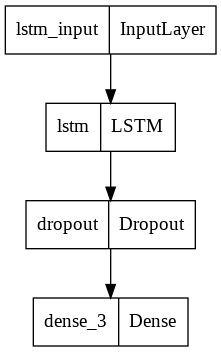

In [95]:
from keras.utils.vis_utils import plot_model

plot_model(model_lstm)

In [96]:
# Check Model summary

model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               42400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 404       
                                                                 
Total params: 42,804
Trainable params: 42,804
Non-trainable params: 0
_________________________________________________________________


In [97]:
# Split Data

train_size = int(len(X_lstm) * 0.7)
X_train_lstm, y_train_lstm = X_lstm[ : train_size], y_lstm[ : train_size]
X_test_lstm, y_test_lstm = X_lstm[train_size : ], y_lstm[train_size : ]

In [98]:
# Fit Model on data

history = model_lstm.fit(X_train_lstm, y_train_lstm, batch_size = 64, epochs = 20)

Epoch 1/20
111/111 [==============================] - 5s 17ms/step - loss: 0.3149 - acc: 0.8635
Epoch 2/20
111/111 [==============================] - 2s 17ms/step - loss: 0.1479 - acc: 0.9424
Epoch 3/20
111/111 [==============================] - 2s 16ms/step - loss: 0.0954 - acc: 0.9675
Epoch 4/20
111/111 [==============================] - 2s 16ms/step - loss: 0.0819 - acc: 0.9723
Epoch 5/20
111/111 [==============================] - 2s 17ms/step - loss: 0.0755 - acc: 0.9744
Epoch 6/20
111/111 [==============================] - 2s 17ms/step - loss: 0.0699 - acc: 0.9763
Epoch 7/20
111/111 [==============================] - 2s 18ms/step - loss: 0.0623 - acc: 0.9798
Epoch 8/20
111/111 [==============================] - 2s 17ms/step - loss: 0.0529 - acc: 0.9821
Epoch 9/20
111/111 [==============================] - 2s 17ms/step - loss: 0.0555 - acc: 0.9831
Epoch 10/20
111/111 [==============================] - 2s 17ms/step - loss: 0.0610 - acc: 0.9788
Epoch 11/20
111/111 [==================

In [99]:
metrics_lstm = model_lstm.evaluate(X_test_lstm, y_test_lstm)

95/95 [==============================] - 1s 4ms/step - loss: 1.0745 - acc: 0.9042


In [100]:
# Model Metrics

y_pred_lstm = np.argmax(model_lstm.predict(X_test_lstm), axis = 1)

accuracy_lstm = metrics_lstm[1]
f1_lstm = f1_score(y_test_lstm, y_pred_lstm, average = 'macro')
precision_lstm = precision_score(y_test_lstm, y_pred_lstm, average = 'macro')
recall_lstm = recall_score(y_test_lstm, y_pred_lstm, average = 'macro')

print(classification_report(y_test_lstm, y_pred_lstm))

# Add to table
table['LSTM'] = [accuracy_lstm, f1_lstm, precision_lstm, recall_lstm]

95/95 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2742
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00        93
           3       0.05      0.02      0.03       201

    accuracy                           0.90      3036
   macro avg       0.25      0.26      0.25      3036
weighted avg       0.85      0.90      0.88      3036



#### **Modified Deep Learning Technique :  Modified LSTM**

#### **Here, the modified LSTM uses different architecture**

In [101]:
# Modified Model with 200 nodes

mod_lstm = keras.Sequential()

mod_lstm.add(LSTM(200, input_shape = (10, 5)))
mod_lstm.add(Dropout(0.5))

mod_lstm.add(Dense(4, activation = "softmax"))

mod_lstm.compile(loss      = "sparse_categorical_crossentropy",
                 metrics   = ['acc'],
                 optimizer = "adam")

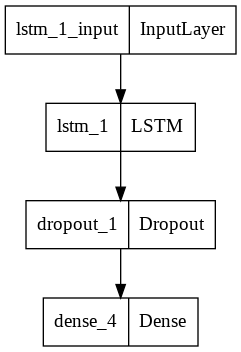

In [102]:
# Plot architecture

plot_model(mod_lstm)

In [103]:
# Check Model summary

mod_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 200)               164800    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 4)                 804       
                                                                 
Total params: 165,604
Trainable params: 165,604
Non-trainable params: 0
_________________________________________________________________


In [104]:
# Fit Model on data

history_mod = mod_lstm.fit(X_train_lstm, y_train_lstm, batch_size = 64, epochs = 20)

Epoch 1/20
111/111 [==============================] - 8s 36ms/step - loss: 0.2333 - acc: 0.8998
Epoch 2/20
111/111 [==============================] - 4s 37ms/step - loss: 0.0968 - acc: 0.9624
Epoch 3/20
111/111 [==============================] - 4s 36ms/step - loss: 0.0757 - acc: 0.9698
Epoch 4/20
111/111 [==============================] - 4s 36ms/step - loss: 0.0725 - acc: 0.9705
Epoch 5/20
111/111 [==============================] - 4s 36ms/step - loss: 0.0606 - acc: 0.9771
Epoch 6/20
111/111 [==============================] - 4s 37ms/step - loss: 0.0508 - acc: 0.9811
Epoch 7/20
111/111 [==============================] - 4s 39ms/step - loss: 0.0476 - acc: 0.9839
Epoch 8/20
111/111 [==============================] - 4s 36ms/step - loss: 0.0403 - acc: 0.9870
Epoch 9/20
111/111 [==============================] - 4s 35ms/step - loss: 0.0410 - acc: 0.9859
Epoch 10/20
111/111 [==============================] - 4s 36ms/step - loss: 0.0382 - acc: 0.9880
Epoch 11/20
111/111 [==================

In [105]:
# Check metrics

metrics_lstm_mod = mod_lstm.evaluate(X_test_lstm, y_test_lstm)

95/95 [==============================] - 1s 10ms/step - loss: 0.9486 - acc: 0.9061


In [106]:
# Add Mod Model to metrics table

y_pred_lstm_mod = np.argmax(mod_lstm.predict(X_test_lstm), axis = 1)

accuracy_lstm_mod = metrics_lstm_mod[1]
f1_lstm_mod = f1_score(y_test_lstm, y_pred_lstm_mod, average = 'macro')
precision_lstm_mod = precision_score(y_test_lstm, y_pred_lstm_mod, average = 'macro')
recall_lstm_mod = recall_score(y_test_lstm, y_pred_lstm_mod, average = 'macro')

print(classification_report(y_test_lstm, y_pred_lstm_mod))

# Add to table
table['Mod LSTM 1'] = [accuracy_lstm_mod, f1_lstm_mod, precision_lstm_mod, recall_lstm_mod]

95/95 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2742
           2       0.00      0.00      0.00        93
           3       0.10      0.05      0.07       201

    accuracy                           0.91      3036
   macro avg       0.35      0.35      0.35      3036
weighted avg       0.85      0.91      0.88      3036



In [107]:
table.T

,Accuracy,F1 Score,Precision,Recall
Decision Tree,0.985481,0.985645,0.985730,0.985573
Random Forest,0.989111,0.989358,0.989343,0.989411
Tuned RandomForest,0.967332,0.967689,0.968085,0.967658
Bagging Classifier,0.976407,0.976494,0.976806,0.976413
SVC,0.553539,0.482052,0.557656,0.557979
KNN,0.947368,0.948020,0.949255,0.947894
Tuned KNeighbors Classifier,0.983666,0.983683,0.983862,0.983680
Naive Bayes,0.782214,0.771816,0.805708,0.780365
Logistic Regression,0.702359,0.692665,0.692070,0.704739
ExtraTrees Classifier,0.990926,0.991086,0.991092,0.991092


#### **Modified LSTM Model with 200 LSTM Cells**

In [108]:
# Modified Model with 200 LSTM Cells nodes and 50 epcohs

lstm_50 = keras.Sequential()

lstm_50.add(LSTM(200, input_shape = (10, 5)))
lstm_50.add(Dropout(0.5))

lstm_50.add(Dense(4, activation = "softmax"))

lstm_50.compile(loss      = "sparse_categorical_crossentropy",
                 metrics   = ['acc'],
                 optimizer = "adam")

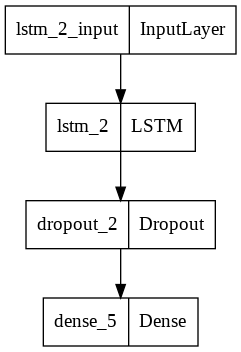

In [109]:
# Plot architecture

plot_model(lstm_50)

In [110]:
# Check Model summary

lstm_50.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 200)               164800    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 804       
                                                                 
Total params: 165,604
Trainable params: 165,604
Non-trainable params: 0
_________________________________________________________________


In [111]:
# Fit Model on data

history_50 = lstm_50.fit(X_train_lstm, y_train_lstm, batch_size = 64, epochs = 50)

Epoch 1/50
111/111 [==============================] - 6s 35ms/step - loss: 0.2161 - acc: 0.9091
Epoch 2/50
111/111 [==============================] - 4s 35ms/step - loss: 0.0825 - acc: 0.9719
Epoch 3/50
111/111 [==============================] - 4s 35ms/step - loss: 0.0728 - acc: 0.9726
Epoch 4/50
111/111 [==============================] - 4s 35ms/step - loss: 0.0571 - acc: 0.9798
Epoch 5/50
111/111 [==============================] - 4s 35ms/step - loss: 0.0589 - acc: 0.9808
Epoch 6/50
111/111 [==============================] - 4s 36ms/step - loss: 0.0554 - acc: 0.9821
Epoch 7/50
111/111 [==============================] - 4s 36ms/step - loss: 0.0455 - acc: 0.9816
Epoch 8/50
111/111 [==============================] - 4s 35ms/step - loss: 0.0442 - acc: 0.9859
Epoch 9/50
111/111 [==============================] - 4s 35ms/step - loss: 0.0443 - acc: 0.9859
Epoch 10/50
111/111 [==============================] - 4s 36ms/step - loss: 0.0365 - acc: 0.9884
Epoch 11/50
111/111 [==================

In [112]:
# Check metrics

metrics_lstm_50 = lstm_50.evaluate(X_test_lstm, y_test_lstm)

95/95 [==============================] - 2s 10ms/step - loss: 1.2050 - acc: 0.9124


In [113]:
# Add Mod Model to metrics table

y_pred_lstm_50 = np.argmax(lstm_50.predict(X_test_lstm), axis = 1)

accuracy_lstm_50 = metrics_lstm_50[1]
f1_lstm_50 = f1_score(y_test_lstm, y_pred_lstm_50, average = 'macro')
precision_lstm_50 = precision_score(y_test_lstm, y_pred_lstm_50, average = 'macro')
recall_lstm_50 = recall_score(y_test_lstm, y_pred_lstm_50, average = 'macro')

print(classification_report(y_test_lstm, y_pred_lstm_50))

# Add to table
table['Mod LSTM 2'] = [accuracy_lstm_50, f1_lstm_50, precision_lstm_50, recall_lstm_50]

95/95 [==============================] - 2s 16ms/step
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2742
           1       0.00      0.00      0.00         0
           2       0.71      0.29      0.41        93
           3       0.04      0.01      0.02       201

    accuracy                           0.91      3036
   macro avg       0.42      0.33      0.35      3036
weighted avg       0.87      0.91      0.89      3036



In [114]:
table.T

,Accuracy,F1 Score,Precision,Recall
Decision Tree,0.985481,0.985645,0.985730,0.985573
Random Forest,0.989111,0.989358,0.989343,0.989411
Tuned RandomForest,0.967332,0.967689,0.968085,0.967658
Bagging Classifier,0.976407,0.976494,0.976806,0.976413
SVC,0.553539,0.482052,0.557656,0.557979
KNN,0.947368,0.948020,0.949255,0.947894
Tuned KNeighbors Classifier,0.983666,0.983683,0.983862,0.983680
Naive Bayes,0.782214,0.771816,0.805708,0.780365
Logistic Regression,0.702359,0.692665,0.692070,0.704739
ExtraTrees Classifier,0.990926,0.991086,0.991092,0.991092


#### **Trying again with 250 LSTM Cells**

In [115]:
# Modified Model with 250 LSTM Cells nodes and 50 epcohs

lstm_300 = keras.Sequential()

lstm_300.add(LSTM(250, input_shape = (10, 5)))
lstm_300.add(Dropout(0.5))

lstm_300.add(Dense(4, activation = "softmax"))

lstm_300.compile(loss      = "sparse_categorical_crossentropy",
                 metrics   = ['acc'],
                 optimizer = "adam")

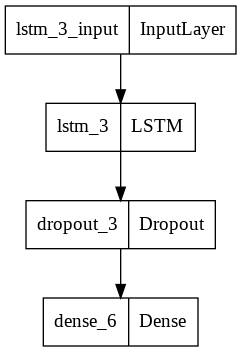

In [116]:
# Plot architecture

plot_model(lstm_300)

In [117]:
# Check Model summary

lstm_300.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 250)               256000    
                                                                 
 dropout_3 (Dropout)         (None, 250)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 1004      
                                                                 
Total params: 257,004
Trainable params: 257,004
Non-trainable params: 0
_________________________________________________________________


In [118]:
# Fit Model on data

history_50 = lstm_50.fit(X_train_lstm, y_train_lstm, batch_size = 64, epochs = 20)

Epoch 1/20
111/111 [==============================] - 6s 51ms/step - loss: 0.0210 - acc: 0.9938
Epoch 2/20
111/111 [==============================] - 4s 36ms/step - loss: 0.0177 - acc: 0.9948
Epoch 3/20
111/111 [==============================] - 4s 38ms/step - loss: 0.0179 - acc: 0.9942
Epoch 4/20
111/111 [==============================] - 4s 35ms/step - loss: 0.0207 - acc: 0.9938
Epoch 5/20
111/111 [==============================] - 4s 37ms/step - loss: 0.0249 - acc: 0.9922
Epoch 6/20
111/111 [==============================] - 4s 36ms/step - loss: 0.0205 - acc: 0.9941
Epoch 7/20
111/111 [==============================] - 4s 35ms/step - loss: 0.0192 - acc: 0.9938
Epoch 8/20
111/111 [==============================] - 4s 35ms/step - loss: 0.0201 - acc: 0.9948
Epoch 9/20
111/111 [==============================] - 4s 35ms/step - loss: 0.0188 - acc: 0.9949
Epoch 10/20
111/111 [==============================] - 4s 35ms/step - loss: 0.0241 - acc: 0.9921
Epoch 11/20
111/111 [==================

In [119]:
# Check metrics

metrics_lstm_300 = lstm_300.evaluate(X_test_lstm, y_test_lstm)

95/95 [==============================] - 2s 13ms/step - loss: 1.0156 - acc: 0.8370


In [120]:
# Add Mod Model to metrics table

y_pred_lstm_300 = np.argmax(lstm_300.predict(X_test_lstm), axis = 1)

accuracy_lstm_300 = metrics_lstm_300[1]
f1_lstm_300 = f1_score(y_test_lstm, y_pred_lstm_300, average = 'macro')
precision_lstm_300 = precision_score(y_test_lstm, y_pred_lstm_300, average = 'macro')
recall_lstm_300 = recall_score(y_test_lstm, y_pred_lstm_300, average = 'macro')

print(classification_report(y_test_lstm, y_pred_lstm_300))

# Add to table
table['Mod LSTM 3'] = [accuracy_lstm_300, f1_lstm_300, precision_lstm_300, recall_lstm_300]

95/95 [==============================] - 2s 12ms/step
              precision    recall  f1-score   support

           0       1.00      0.83      0.90      2742
           2       0.87      1.00      0.93        93
           3       0.28      0.92      0.43       201

    accuracy                           0.84      3036
   macro avg       0.72      0.91      0.75      3036
weighted avg       0.95      0.84      0.87      3036



In [121]:
table.T

,Accuracy,F1 Score,Precision,Recall
Decision Tree,0.985481,0.985645,0.985730,0.985573
Random Forest,0.989111,0.989358,0.989343,0.989411
Tuned RandomForest,0.967332,0.967689,0.968085,0.967658
Bagging Classifier,0.976407,0.976494,0.976806,0.976413
SVC,0.553539,0.482052,0.557656,0.557979
KNN,0.947368,0.948020,0.949255,0.947894
Tuned KNeighbors Classifier,0.983666,0.983683,0.983862,0.983680
Naive Bayes,0.782214,0.771816,0.805708,0.780365
Logistic Regression,0.702359,0.692665,0.692070,0.704739
ExtraTrees Classifier,0.990926,0.991086,0.991092,0.991092


### **Fb Prophet Model**

In [122]:
# Prophet Model

from fbprophet import Prophet

model_prophet = Prophet()

In [123]:
# Train Test Split the data

val = round(0.75 * df.shape[0])

df.reset_index(inplace = True)

train = df[['date_time', 'room_occupancy_count']][1 : val]
test = df[['date_time', 'room_occupancy_count']][val : ]

# Rename to 'ds' and 'y'
train.columns = ['ds', 'y']
test.columns = ['ds', 'y']

In [124]:
# Fit model on data

model_prophet.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [125]:
# Forecasting

future = model_prophet.make_future_dataframe(periods = 48, freq = 'h')
forecast = model_prophet.predict(future)

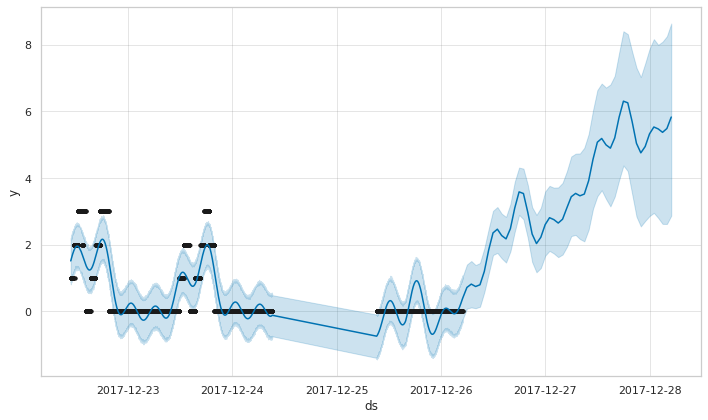

In [126]:
# Plot forecasting for next 48 hours

forecast_plot_48 = model_prophet.plot(forecast)

In [127]:
# Check metrics

forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-12-22 10:50:12,1.277052,0.875589,2.158984,1.277052,1.277052,0.239713,0.239713,0.239713,0.239713,0.239713,0.239713,0.0,0.0,0.0,1.516766
1,2017-12-22 10:50:42,1.276606,0.894253,2.165526,1.276606,1.276606,0.244255,0.244255,0.244255,0.244255,0.244255,0.244255,0.0,0.0,0.0,1.520861
2,2017-12-22 10:51:13,1.276145,0.850334,2.185846,1.276145,1.276145,0.248942,0.248942,0.248942,0.248942,0.248942,0.248942,0.0,0.0,0.0,1.525087
3,2017-12-22 10:51:44,1.275685,0.841057,2.202841,1.275685,1.275685,0.253623,0.253623,0.253623,0.253623,0.253623,0.253623,0.0,0.0,0.0,1.529307
4,2017-12-22 10:52:14,1.275238,0.813912,2.218444,1.275238,1.275238,0.258146,0.258146,0.258146,0.258146,0.258146,0.258146,0.0,0.0,0.0,1.533385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7639,2017-12-28 00:58:18,5.834115,2.957757,8.163082,3.335856,8.341012,-0.303774,-0.303774,-0.303774,-0.303774,-0.303774,-0.303774,0.0,0.0,0.0,5.530341
7640,2017-12-28 01:58:18,5.947401,2.803703,7.991945,3.377573,8.549942,-0.474728,-0.474728,-0.474728,-0.474728,-0.474728,-0.474728,0.0,0.0,0.0,5.472673
7641,2017-12-28 02:58:18,6.060688,2.626586,8.086737,3.424831,8.739501,-0.690161,-0.690161,-0.690161,-0.690161,-0.690161,-0.690161,0.0,0.0,0.0,5.370527
7642,2017-12-28 03:58:18,6.173974,2.623894,8.249589,3.444598,8.940463,-0.689074,-0.689074,-0.689074,-0.689074,-0.689074,-0.689074,0.0,0.0,0.0,5.484900


### **It can be observed from the fbprophet model, which tries to predict continuous values as output that the room occupancy count with time is increasing, hitting 6 and beyond for just 48 hrs forecast. This doesn't seem to be a true metric as the given datset has room occupancy count in a range of 1-4, therefore, models who forecast continuous values as output such as ARIMA Family, Holt Winters etc are dropped from the thesis**

## **Results**

In [133]:
table.T

,Accuracy,F1 Score,Precision,Recall
Decision Tree,0.985481,0.985645,0.985730,0.985573
Random Forest,0.989111,0.989358,0.989343,0.989411
Tuned RandomForest,0.967332,0.967689,0.968085,0.967658
Bagging Classifier,0.976407,0.976494,0.976806,0.976413
SVC,0.553539,0.482052,0.557656,0.557979
KNN,0.947368,0.948020,0.949255,0.947894
Tuned KNeighbors Classifier,0.983666,0.983683,0.983862,0.983680
Naive Bayes,0.782214,0.771816,0.805708,0.780365
Logistic Regression,0.702359,0.692665,0.692070,0.704739
ExtraTrees Classifier,0.990926,0.991086,0.991092,0.991092


In [129]:
# results = table.T

In [130]:
# results.to_excel('eval_metrics.xlsx')

In [131]:
# table.T['Precision'].to_excel('precision_table.xlsx')
# table.T['Recall'].to_excel('recall_table.xlsx')
# table.T['Accuracy'].to_excel('accuracy_table.xlsx')
# table.T['F1 Score'].to_excel('f1_table.xlsx')

In [132]:
# table.T.to_excel('final_metrics.xlsx')